<a href="https://colab.research.google.com/github/krutika73/REGRESSION-ON-NYC-TAXI-TRIP-DURATION/blob/main/Krurika_regression_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC TAXI TRIP TIME PREDICTION



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**   Krutika Bhile


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


New York City is one of the world's biggest cities, and its transportation system is one of its most important infrastructure elements.It is common for residents and visitors to use taxis as a mode of transportation, but the duration of a taxi trip can vary greatly depending on various factors, such as traffic, weather, and time of day.Taxi drivers and passengers can find it hard to estimate the duration of a trip accurately because of this.

Using a variety of input features, such as pickup and dropoff locations, time of day, and distance, the purpose of this project is to develop a machine learning regression model that can predict taxi trip duration in New York City.Predictions made by the model must be accurate and should be able to pinpoint the factors that affect the length of a taxi ride.In addition to improving efficiency and convenience for both passengers and drivers, the model can improve the accuracy of trip duration estimates.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [84]:
# Import Libraries
# Import Libraries

## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Statistics Library
import scipy.stats as stats

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns

## Machine Learning 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Importing essential libraries to check the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Warnings 
import warnings 
warnings.filterwarnings('ignore')

### Dataset Loading

In [85]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC Taxi Data.csv')

### Dataset First View

In [87]:
# Dataset First Look
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1            -73.98            40.77             -73.96   
1                1            -73.98            40.74             -74.00   
2                1            -73.98            40.76             -74.01   
3                1            -74.01            40.72             -74.01   
4                1            -73.97            40.79             -73.97   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0             40.77                  N            455  
1             40.73                  N            663  
2             40.71                  N           2124  
3             40.71                  N            429  
4             40.78                  N            435

In [88]:
df.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4            -73.98            40.75   
1458640                1            -74.00            40.75   
1458641                1            -73.96            40.77   
1458642                1            -73.98            40.75   
1458643                1            -73.98            40.78   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458639             -73.99             40.74                  N            778  
1458640             -73.97             40.80                  N            655  
1458641             -74.00             40.71                  N            764  
1458642             -73.97             40.76                  N            373  
1458643             -73.97             40.79                  N            198

### Dataset Rows & Columns count

In [89]:
# Dataset Rows & Columns count

print("Dataset size")
print("Rows {} Columns {}".format(df.shape[0], df.shape[1]))
     

Dataset size
Rows 1458644 Columns 11


### Dataset Information

In [90]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [91]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [92]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


<Axes: >

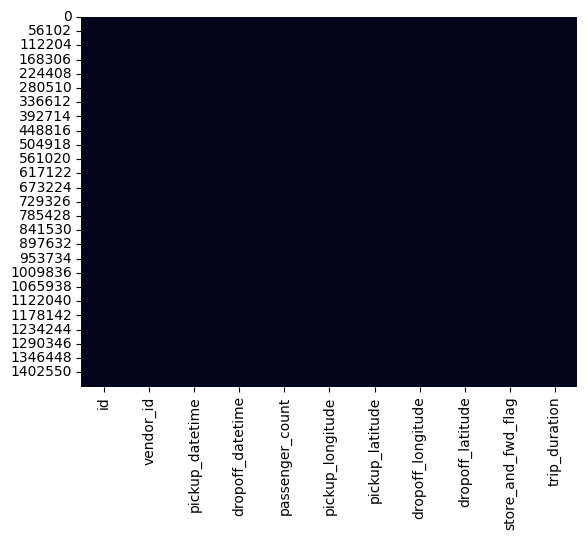

In [93]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Datasets for NYC taxi trip duration are historical records about taxi rides in New York City, including the pickup and drop-off locations, the time of day, the distance, and the duration of the trip.One potential application of utilizing data is to train machine learning algorithms that can make predictions about the duration of taxi trips.

## ***2. Understanding Your Variables***

In [94]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [95]:
# Dataset Describe
df.describe(include='all')

id  vendor_id      pickup_datetime     dropoff_datetime  \
count     1458644 1458644.00              1458644              1458644   
unique    1458644        NaN              1380222              1380377   
top     id2875421        NaN  2016-03-04 08:07:34  2016-02-19 19:25:04   
freq            1        NaN                    5                    5   
mean          NaN       1.53                  NaN                  NaN   
std           NaN       0.50                  NaN                  NaN   
min           NaN       1.00                  NaN                  NaN   
25%           NaN       1.00                  NaN                  NaN   
50%           NaN       2.00                  NaN                  NaN   
75%           NaN       2.00                  NaN                  NaN   
max           NaN       2.00                  NaN                  NaN   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
count        1458644.00        1458644.00       1458644.00         1458644.00   
unique              NaN               NaN              NaN                NaN   
top                 NaN               NaN              NaN                NaN   
freq                NaN               NaN              NaN                NaN   
mean               1.66            -73.97            40.75             -73.97   
std                1.31              0.07             0.03               0.07   
min                0.00           -121.93            34.36            -121.93   
25%                1.00            -73.99            40.74             -73.99   
50%                1.00            -73.98            40.75             -73.98   
75%                2.00            -73.97            40.77             -73.96   
max                9.00            -61.34            51.88             -61.34   

        dropoff_latitude store_and_fwd_flag  trip_duration  
count         1458644.00            1458644     1458644.00  
unique               NaN                  2            NaN  
top                  NaN                  N            NaN  
freq                 NaN            1450599            NaN  
mean               40.75                NaN         959.49  
std                 0.04                NaN        5237.43  
min                32.18                NaN           1.00  
25%                40.74                NaN         397.00  
50%                40.75                NaN         662.00  
75%                40.77                NaN        1075.00  
max                43.92                NaN     3526282.00

### Variables Description 

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [96]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [97]:
# Write your code to make your dataset analysis ready.

In [98]:
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


dtype
id                   object
vendor_id             int64
pickup_datetime      object
dropoff_datetime     object
passenger_count       int64
pickup_longitude    float64
pickup_latitude     float64
dropoff_longitude   float64
dropoff_latitude    float64
store_and_fwd_flag   object
trip_duration         int64

In [99]:
#Convert timestamp to datetime format to fetch the other details
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [100]:
from pandas_datareader import data as web
     

In [101]:
#addding new column to dataframe such as weekday,month,weekday_num and pickup_hour to gain more insights from the data 

df['weekday_num']   = df.pickup_datetime.dt.weekday
df['month']         = df.pickup_datetime.dt.month
df['pickup_hour']   = df.pickup_datetime.dt.hour
df['pickup_minute'] = df.pickup_datetime.dt.minute
df['weekday']       =df['pickup_datetime'].dt.day_name()

In [102]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.

In [103]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from haversine import haversine

In [105]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop   = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [106]:
#Calculate distance and assign new column to the dataframe.
df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [107]:
#Calculate Speed in km/hr for further insights
df['speed'] = (df.distance/(df.trip_duration/3600))

In [108]:
df.head(3)

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1            -73.98            40.77             -73.96   
1                1            -73.98            40.74             -74.00   
2                1            -73.98            40.76             -74.01   

   dropoff_latitude store_and_fwd_flag  trip_duration  weekday_num  month  \
0             40.77                  N            455            0      3   
1             40.73                  N            663            6      6   
2             40.71                  N           2124            1      1   

   pickup_hour  pickup_minute  weekday  distance  speed  
0           17             24   Monday      1.50  11.86  
1            0             43   Sunday      1.81   9.80  
2           11             35  Tuesday      6.39  10.82

### What all manipulations have you done and insights you found?

1.To gain deeper insights, new columns like weekday_num, weekday, month, pickup_minute, and pickup_hour were appended to the dataframe after converting the timestamp to datetime.

2.A new column was created by utilizing the calc_distance function, which employed the Haversine formula to determine the distance between the pickup and drop-off coordinates.

3.For further analysis, the speed was computed in km/hr utilizing the distance and trip_duration.







## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 ID (Univariate Analysis)

In [109]:
# Chart - 1 visualization code
# First Check For count of unique id's in the dataset
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(df.id.nunique()))

There are 1458644 unique id's in Training dataset, which is equal to the number of records


#### Chart - 2 Vender ID (Univariate Analysis)

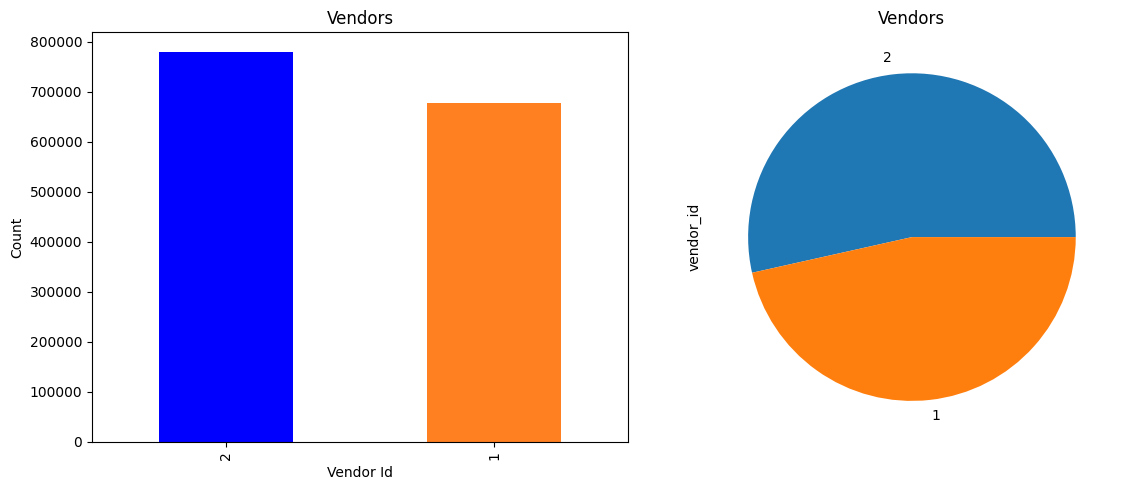

In [110]:
# Chart - 2 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = df['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color = ('blue',(1, 0.5, 0.13)))
df['vendor_id'].value_counts().plot(kind='pie',title="Vendors",ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()

##### 1. Why did you pick the specific chart?

Pie charts are suitable for illustrating parts of a whole, where each segment represents a proportion of the total data. On the contrary, bar plots are more appropriate for comparing the magnitudes of distinct data sets.

##### 2. What is/are the insight(s) found from the chart?

From the above graphs, it can be observed that there are only two vendors (1 and 2), and they both have a comparable number of trips, with a slight variation. Nevertheless, the charts suggest that vendor 2 is more favored by the general populace.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When devising a business strategy, this data can aid in making well-informed choices about vendor selection and resource allocation. If both vendors are producing similar numbers of trips, the company may opt to prioritize promoting vendor 2 due to its greater popularity among customers. Additionally, it may be advantageous for the company to investigate the reasons for vendor 2's success and attempt to apply those tactics to vendor 1.

#### Chart - 3 Passengers (Univariate Analysis)

In [111]:
# Chart - 3 visualization code
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
df.passenger_count.value_counts()
     

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

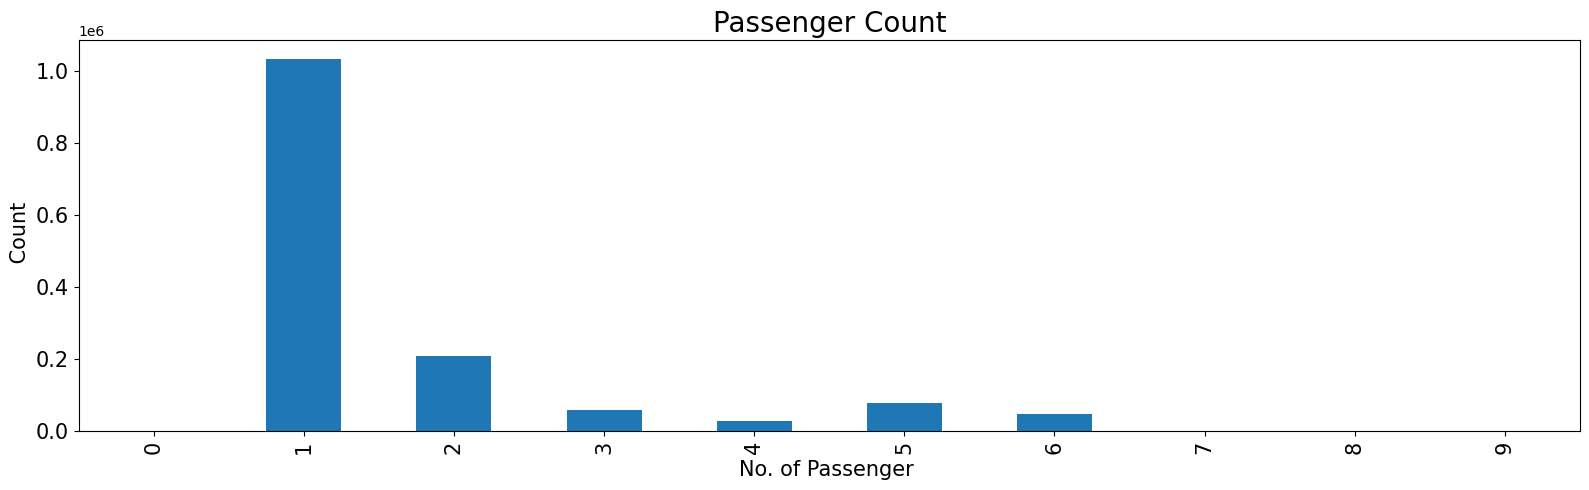

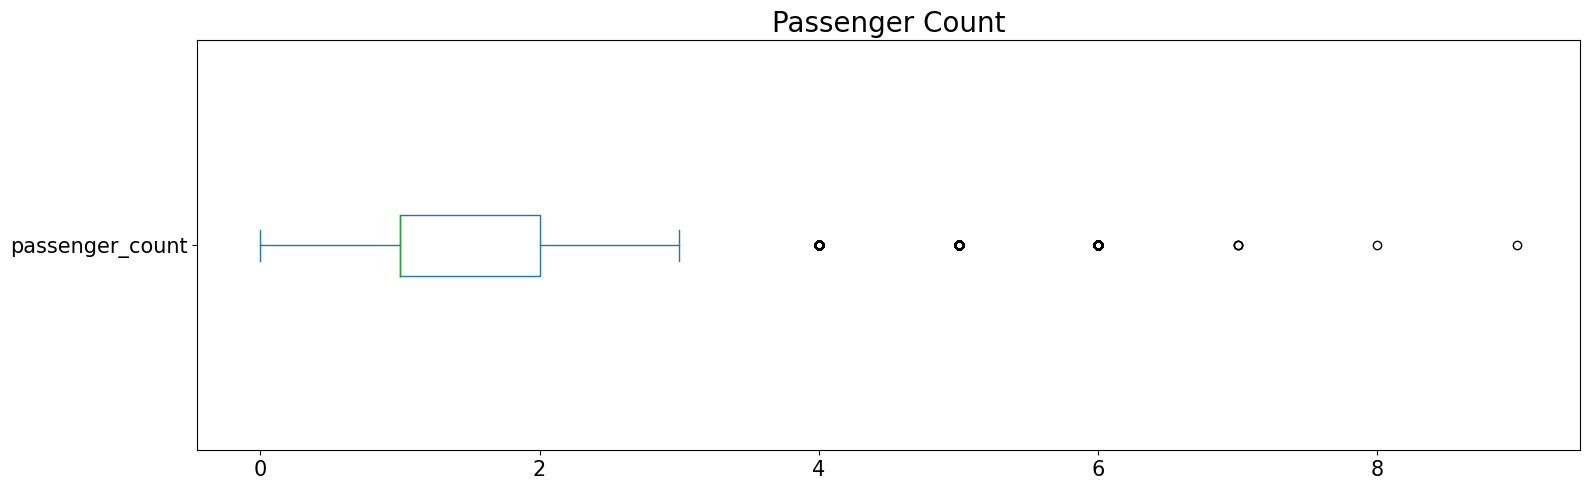

In [112]:
# Chart - 3 visualization code
fig,axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
line = df['passenger_count'].value_counts().sort_index().plot(kind='bar',fontsize = 15)
line.set_ylabel(" Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
box = df['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
     

##### 1. Why did you pick the specific chart?

Count plots are a type of visual representation that are commonly used to display the frequency of unique values within a dataset. By showing the number of occurrences of each value, count plots provide insight into the distribution of data and can help identify patterns or trends.

On the other hand, box plots are a type of visualization that are used to represent the distribution of a set of values. They display key statistical measures such as the median, quartiles, and outliers of the data set. Box plots are useful for identifying potential anomalies and patterns within the data, and can provide valuable insights into the distribution of the data.

##### 2. What is/are the insight(s) found from the chart?

In the dataset, it was observed that some trips had no passenger recorded, while others had an exceptionally high number of passengers, ranging from 6 to 9. Such counts are considered as outliers and may suggest possible irregularities in the data.

However, the majority of the trips recorded consisted of 1 or 2 passengers, making them the most common group in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the dataset includes trips with zero or an abnormally high number of passengers, it is possible that the data is inconsistent, and such inconsistencies can lead to inaccuracies in prediction models. Therefore, it is important for the company to identify and address any data quality issues that may exist.

By analyzing the distribution of passenger counts, the company can develop more precise prediction models that take into consideration the impact of the number of passengers on trip time. This understanding can be used to improve the accuracy of the prediction model and ultimately lead to better service for customers.

#### Chart - 4Trip duration (Univariate Analysis)

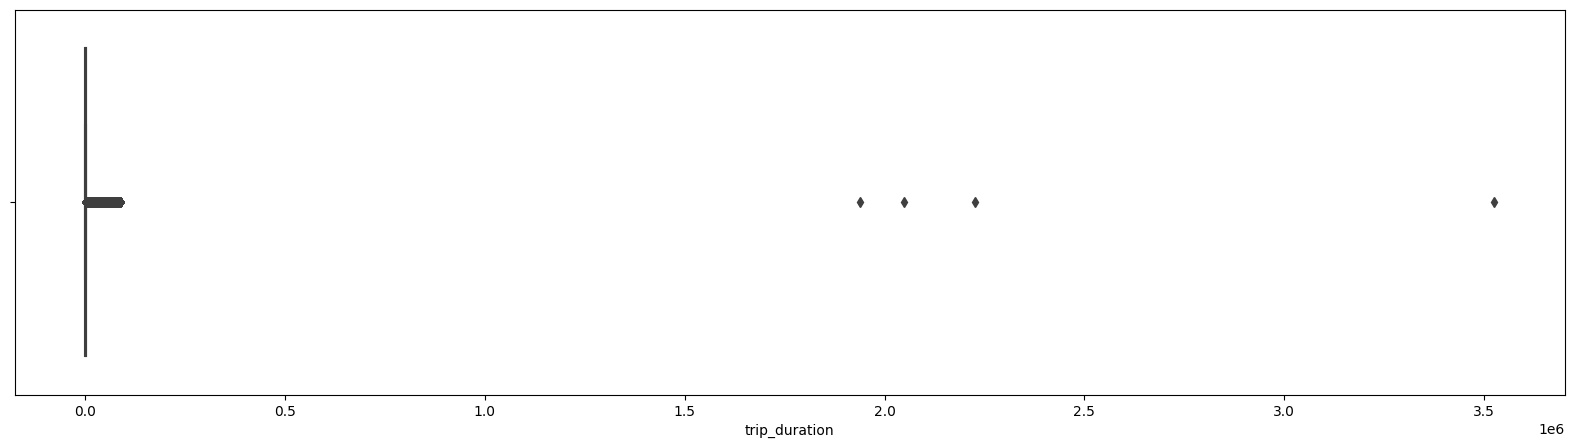

In [113]:
# Chart - 4 visualization code
plt.figure(figsize = (20,5))
sns.boxplot(x=df.trip_duration)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'less then 1min'),
  Text(1, 0, 'within 10 mins'),
  Text(2, 0, 'within 30 mins'),
  Text(3, 0, 'within hour'),
  Text(4, 0, 'within day'),
  Text(5, 0, 'within two days'),
  Text(6, 0, 'more then two day')])

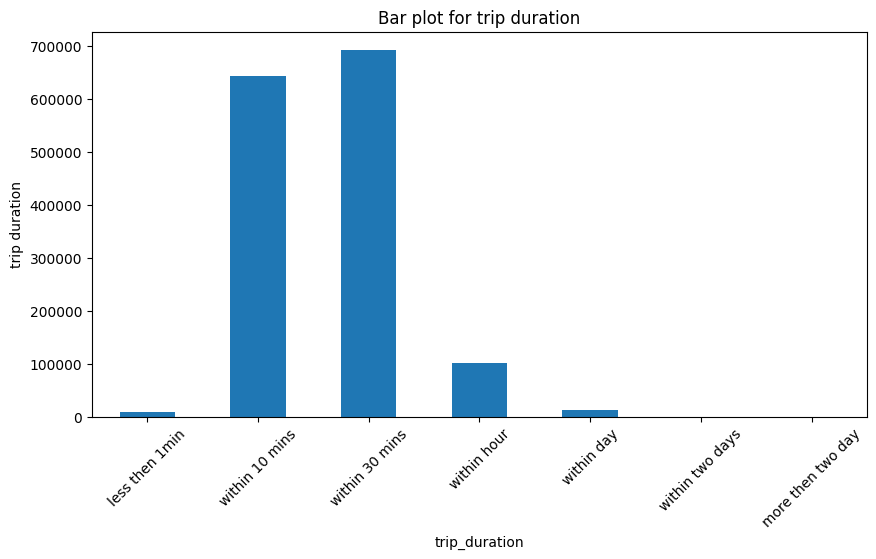

In [114]:
# segregrating the dependent variable into different categories.
plt.figure(figsize=[10,5])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
df.groupby(pd.cut(df['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

Box plots are a type of visualization that represents the distribution of a set of values by showing the median, quartiles, and outliers of the data. They are useful for identifying patterns and potential anomalies in various types of data, including passenger count.

Bar plots, on the other hand, are used to compare the sizes of different data sets we have created. They are useful for visualizing the relative frequencies or values of different categories, rather than the distribution of a single variable.

##### 2. What is/are the insight(s) found from the chart?

1.Trip durations exceeding 100000 seconds are considered as outliers and should be excluded from the dataset to avoid distorting the analysis and modeling process.

2.The existence of trip durations as low as 1 second suggests the presence of trips with a distance of 0 km, meaning that the taxi did not move during that time.

3.The majority of trips lasted between 10 and 30 minutes, indicating that this is the typical duration for most taxi rides in the dataset.

4.The fact that the mean and mode of trip duration are not the same indicates that the distribution is right-skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the patterns in trip duration can help the company tailor its services to better suit the preferences and requirements of its customers. For instance, by providing appropriate vehicles for longer trips, the company can improve the overall customer experience.

#### Chart - 5 Distance (Univariate Analysis)

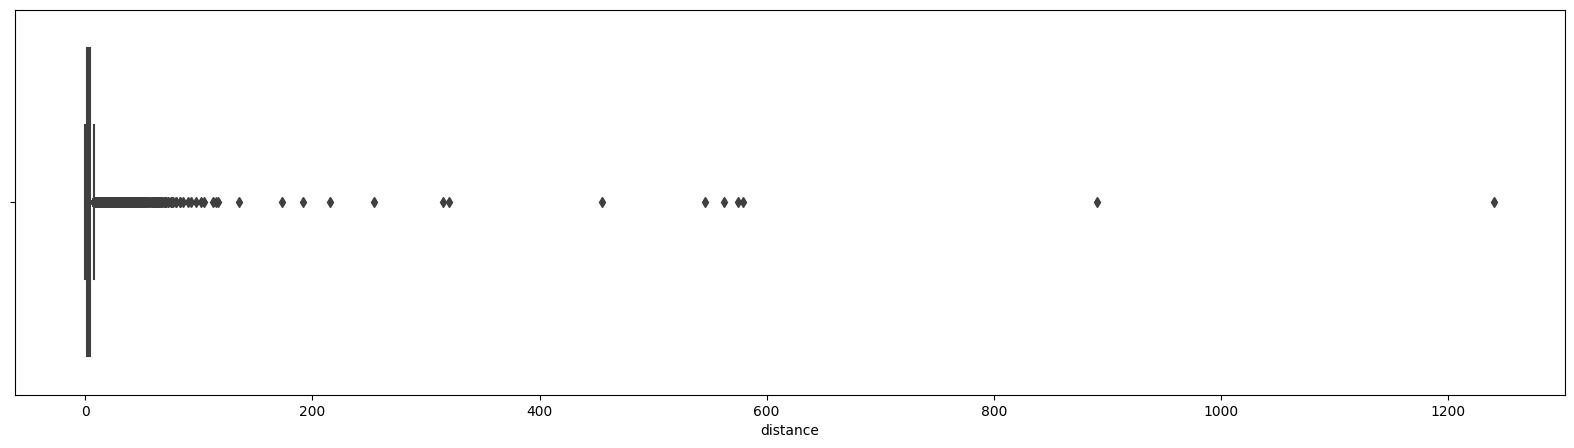

In [115]:
# Chart - 5 visualization code
plt.figure(figsize = (20,5))
sns.boxplot(x=df.distance)
plt.show()

In [116]:
df['distance'].mean()

3.4408686547345293

In [117]:
## We will check this records having distance as zero.

In [118]:
print(f"There are {df.distance[df.distance == 0 ].count()} trip records with 0 distance.")

There are 5897 trip records with 0 distance.


In [119]:
df[df.distance == 0 ].head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
246   id3487442          2 2016-02-29 18:39:12 2016-02-29 18:42:59   
291   id0924324          2 2016-05-10 18:07:52 2016-05-10 18:26:21   
407   id1145809          2 2016-05-16 23:15:13 2016-05-16 23:31:00   
702   id3499387          1 2016-01-25 19:45:12 2016-01-25 19:54:52   
1620  id0753277          1 2016-01-27 22:29:31 2016-01-27 22:29:58   

      passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
246                 1            -73.98            40.77             -73.98   
291                 2            -73.96            40.78             -73.96   
407                 6            -73.81            40.69             -73.81   
702                 1            -73.79            40.65             -73.79   
1620                1            -74.21            40.82             -74.21   

      dropoff_latitude store_and_fwd_flag  trip_duration  weekday_num  month  \
246              40.77                  N            227            0      2   
291              40.78                  N           1109            1      5   
407              40.69                  N            947            0      5   
702              40.65                  N            580            0      1   
1620             40.82                  N             27            2      1   

      pickup_hour  pickup_minute    weekday  distance  speed  
246            18             39     Monday      0.00   0.00  
291            18              7    Tuesday      0.00   0.00  
407            23             15     Monday      0.00   0.00  
702            19             45     Monday      0.00   0.00  
1620           22             29  Wednesday      0.00   0.00

There are approximately 6,000 trip records with a distance of 0, which may indicate some data inconsistencies. Several possible explanations include customers canceling the trip immediately after booking, issues with GPS tracking, or drivers canceling the trip after accepting it. Additionally, there are instances where the drop-off location is the same as the pick-up location, which could further indicate inconsistencies in the data. Imputing distance values based on a correlation with the duration may not be appropriate in this case, as it may not align with the drop-off location coordinates. Further analysis in bivariate analysis with trip duration may shed more light on this issue.

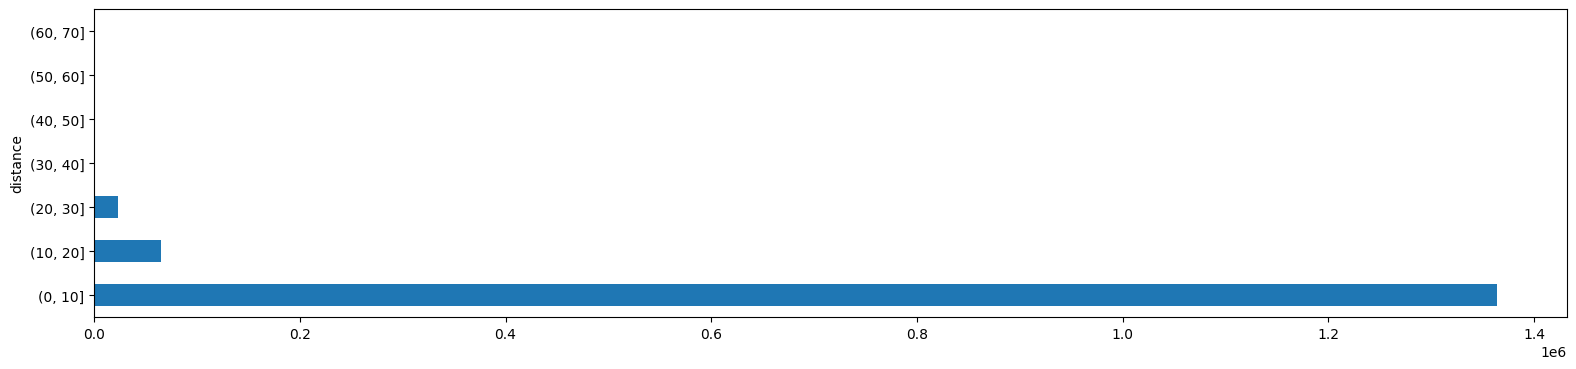

In [120]:
df.distance.groupby(pd.cut(df.distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (19,4))
plt.show()
     

The data suggests that the majority of trips fall within the 1-10 km range, with some longer trips between 10-30 km. The frequency of trips outside of these ranges is relatively low, which may be why the bars for these ranges are not as visible on the graph.

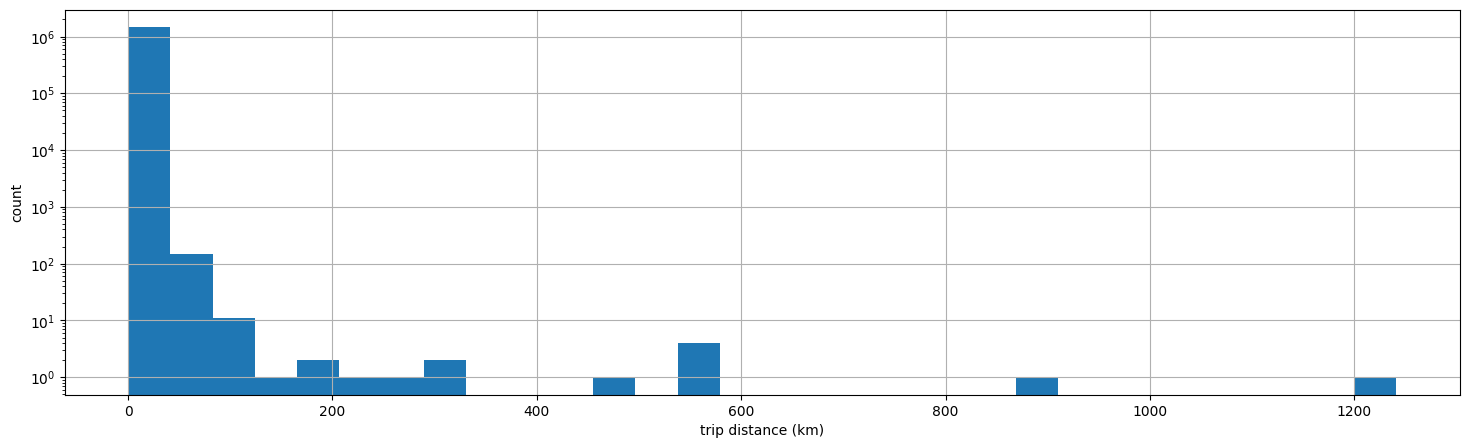

In [121]:
ax = df['distance'].hist(bins=30, figsize=(18,5))
ax.set_yscale('log')
ax.set_xlabel("trip distance (km)")
ax.set_ylabel("count")
plt.show()
     

Based on the distribution of trip distances and the geographic size of New York City, we determined that a reasonable threshold for categorizing trips as either short or long distance would be 50 kilometers.

In [122]:
df_short = df[df.distance <= 50].count()
df_long = df[df.distance > 50].count()
print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total")
     

Short Trips: 1458556 records in total.
Long Trips: 88 records in total


##### 1. Why did you pick the specific chart?

As discussed earlier, box plots are an effective way to visualize the distribution of a set of values by displaying the median, quartiles, and outliers. Therefore, we utilized box plots to examine the distribution of the distance data.

Histograms, on the other hand, offer a convenient method for quickly understanding the distribution of data and can also be used to create categorical features for machine learning models by binning the intervals.

##### 2. What is/are the insight(s) found from the chart?

Some trips in the dataset have a distance of over 100 km, while others have a distance value of 0 km. On average, the distance traveled is approximately 3.5 km.The majority of trips (1458556 records) are categorized as Short Trips, with only 88 records classified as Long Trips.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can optimize its pricing strategies by charging appropriately for longer trips based on a better understanding of the average distance traveled.

#### Chart - 6 Speed (Univariate Analysis)

We can visualize the speed of different trips by calculating the ratio of distance to time. It is important to note that the maximum speed limit in NYC is 25 mph (40 kmph) in urban areas and 65 mph (104 kmph) on controlled state highways.

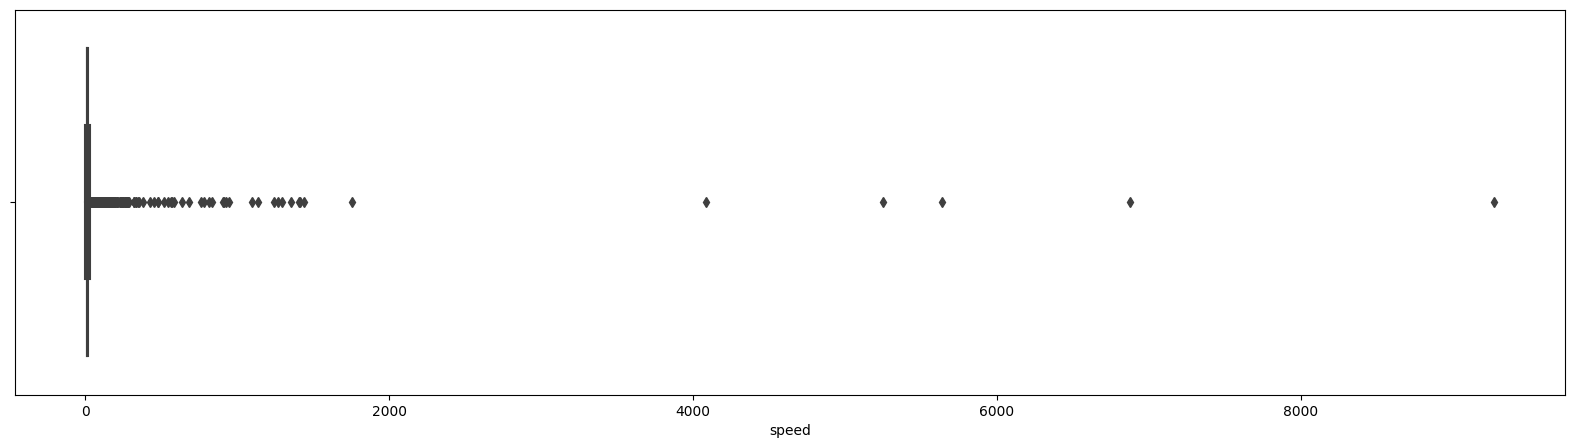

In [123]:
# Chart - 6 visualization code
plt.figure(figsize = (20,5))
sns.boxplot(x=df.speed)
plt.show()
     

The recorded data shows that some trips were completed at an unusually high speed of over 200 kmph, which could be an indication of errors in the data collection process.

Let's exclude those trips and analyze the ones that were completed within the speed limit of 104 kmph.

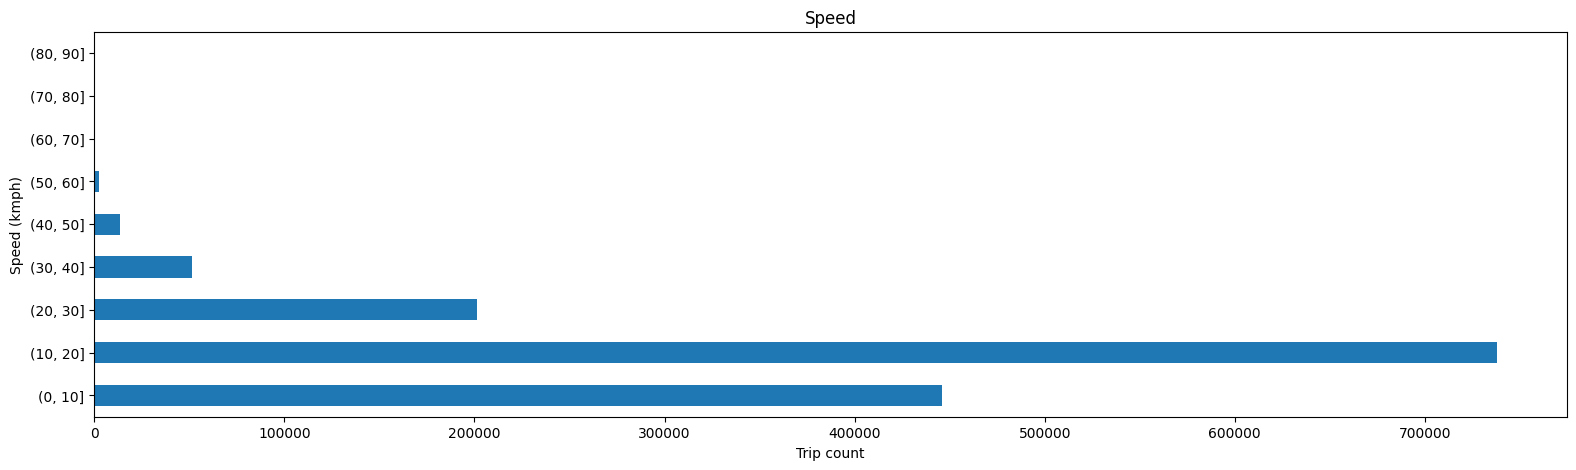

In [124]:
df = df[df.speed <= 104]
df.speed.groupby(pd.cut(df.speed, np.arange(0,100,10))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('Trip count')
plt.ylabel('Speed (kmph)')
plt.title('Speed')
plt.show()

Trips with speeds over 30 kmph are being considered as outliers, but it is important to note that they are still well within the highest speed limit of 104 kmph on state-controlled highways, so we cannot completely disregard them.

Mostly trips are done at a speed range of 10-20kmph.

##### 1. Why did you pick the specific chart?

The horizontal bar plot is an appropriate choice to display the distribution of the speed ranges of a vehicle, which is a categorical variable.

Bar plots are commonly used for comparing the values of different categories, and the horizontal orientation of the bar plot makes it easier to compare the trip counts for each speed range. Moreover, the use of a bar plot aids in visualizing the distribution of the speeds, allowing for a quick understanding of the number of trips falling under each speed range.

##### 2. What is/are the insight(s) found from the chart?

The graph clearly shows that the majority of trips were completed within the speed range of 10-20 kmph, confirming our initial assumption.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Detecting and removing outliers, such as trips with abnormally high speeds, is important for improving the accuracy of the data used in the prediction model. By removing these outliers, the model can make more accurate predictions about trip times. Additionally, analyzing the speed distribution can provide insights into the average speed of vehicles in different regions or at different times of day, which can be valuable information for optimizing routes and predicting trip durations.

#### Chart - 7  Trips Per Hour (Bivariate Analysis)

In [125]:
unique_counts = df['pickup_hour'].value_counts()
print(unique_counts)

18    90587
19    90302
21    84177
20    84063
22    80491
17    76477
14    74285
12    71868
15    71801
13    71466
23    69776
11    68466
9     67656
8     67050
10    65434
16    64299
7     55597
0     53237
1     38566
6     33241
2     27970
3     20889
4     15788
5     14999
Name: pickup_hour, dtype: int64


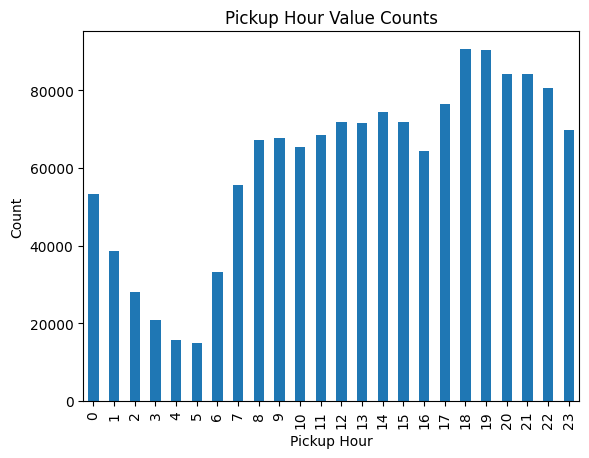

In [126]:
# Chart - 7 visualization code
unique_counts = df['pickup_hour'].value_counts().sort_index()
unique_counts.plot(kind='bar')
plt.title('Pickup Hour Value Counts')
plt.xlabel('Pickup Hour')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot, which is also referred to as a bar plot, is a common visualization tool utilized for comparing the frequency or count of occurrences across different categories. Specifically, in this instance, the categories pertain to the various hours of the day, with the count plot displaying the total number of trips taken during each hour.

##### 2. What is/are the insight(s) found from the chart?

Based on the plot, it can be observed that the 18th and 19th hours of the day exhibit the greatest frequency of trips.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By comprehending the hourly pattern of trips, the business can enhance its fleet deployment strategy. For instance, in scenarios where there is a substantial requirement for taxis during the 18th and 19th hours of the day, the business can allocate additional vehicles during those hours to fulfill the demand.

#### Chart - 8 Trips Per weekday (Bivariate Analysis)

In [127]:
unique_counts_weekday = df['weekday'].value_counts()

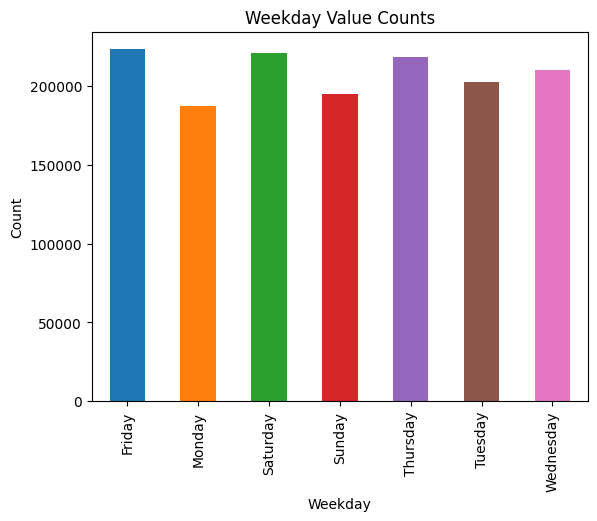

In [128]:
# Chart - 8 visualization code
weekday_counts = df['weekday'].value_counts().sort_index()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
weekday_counts.plot(kind='bar', color=colors)
plt.title('Weekday Value Counts')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

By utilizing a count plot, it becomes easier to visualize the distribution of trips across different days of the week, and to discern the days with the highest and lowest volumes of trips. This information can prove valuable for comprehending the demand patterns for the taxi service, as well as predicting future trip times.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates an upward trend in taxi pickups from Monday to Friday, followed by a decline on weekends, which is a common pattern as people who typically commute to work during the week tend to stay home for rest on weekends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By being aware of the days with higher taxi demand, the company can plan accordingly and ensure that more drivers and vehicles are available on those days. This proactive approach can help enhance the overall customer experience, by reducing instances of extended wait times for taxi service.

#### Chart - 9 Trips Per Month (Bivariate Analysis)

In [129]:
unique_counts_month = df['month'].value_counts()

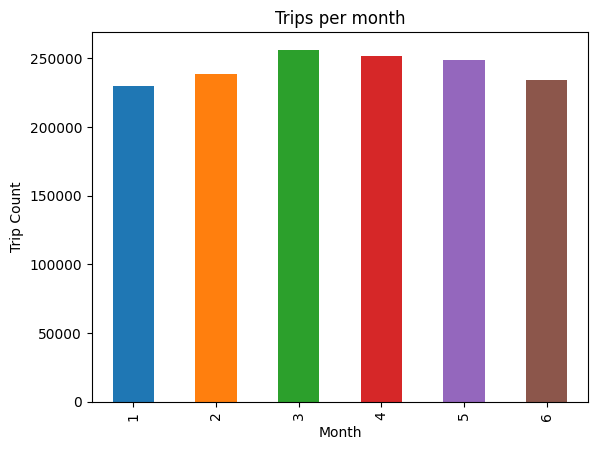

In [130]:
# create a list of colors for each month
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#8ca252', '#bd9e39']

# get value counts of trips per month
unique_counts = df['month'].value_counts().sort_index()

# plot a bar chart of trips per month with a unique color for each month
unique_counts.plot(kind='bar', color=colors)
plt.title('Trips per month')
plt.xlabel('Month')
plt.ylabel('Trip Count')
plt.show()

##### 1. Why did you pick the specific chart?

The chart was chosen to display the distribution of trips taken per month. Bar charts are an excellent tool to compare the number of trips taken in various months and to analyze the overall trend. Utilizing a bar chart allows for an easier recognition of the months with higher or lower demands for the taxi service.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart, it can be observed that the number of trips taken each month is quite uniform, with an average range of 200,000 to 250,000 trips per month. This data indicates that there is a degree of stability in the demand for the taxi service all year round.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart does not provide any evidence of factors that could contribute to a decline in growth.

#### Chart - 10 Trip Duration per hour (Bivariate Analysis)

To plot the total trip duration against the month, we need to aggregate the duration data by using a measure such as sum, mean, median or mode. As we have already analyzed the outliers, using the mean for aggregation would enable us to visualize the pattern without introducing bias to the general trend.

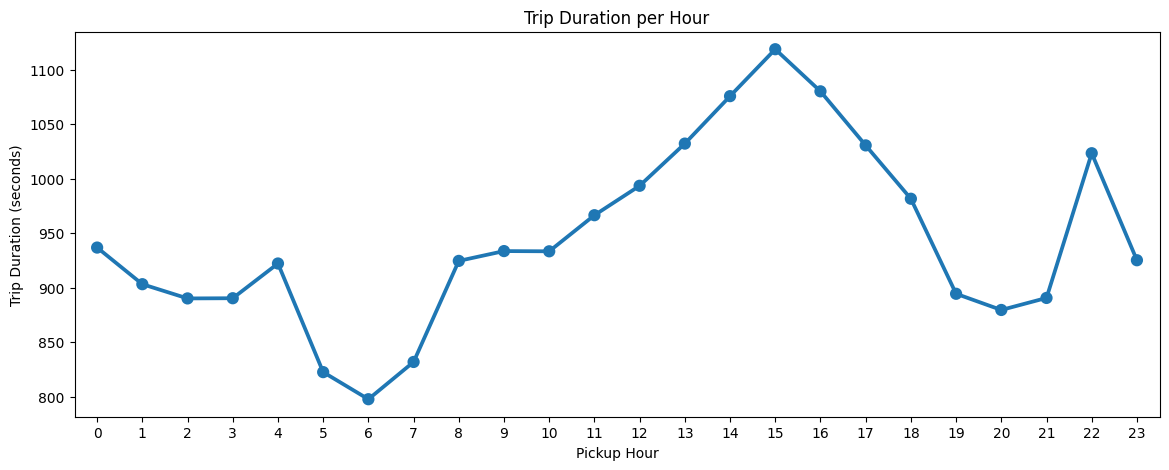

In [131]:
# Chart - 10 visualization code
plt.figure(figsize = (14,5))
group1 = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(x=group1.index, y=group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.show()


##### 1. Why did you pick the specific chart?

The purpose of selecting this chart was to represent the variation in the average trip duration throughout different hours of the day. This graph helps in detecting any noticeable patterns or trends in the duration of trips as time passes.

##### 2. What is/are the insight(s) found from the chart?

The duration of an average trip is shortest at 6 AM when there is less traffic on the road. As for the peak hours, around 3 PM, the average trip duration tends to be longer. However, during the early morning hours before 6 AM and the late evening hours after 6 PM, the average trip duration remains relatively consistent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By utilizing the insights gained from the analysis, it is possible to optimize the routes taken by taxis, which can lead to a reduction in the overall time spent on the road. This, in turn, can increase the number of trips completed in a day, resulting in greater efficiency and profitability for the taxi service.

#### Chart - 11 Trip duration per WeekDay (Bivariate Analysis)

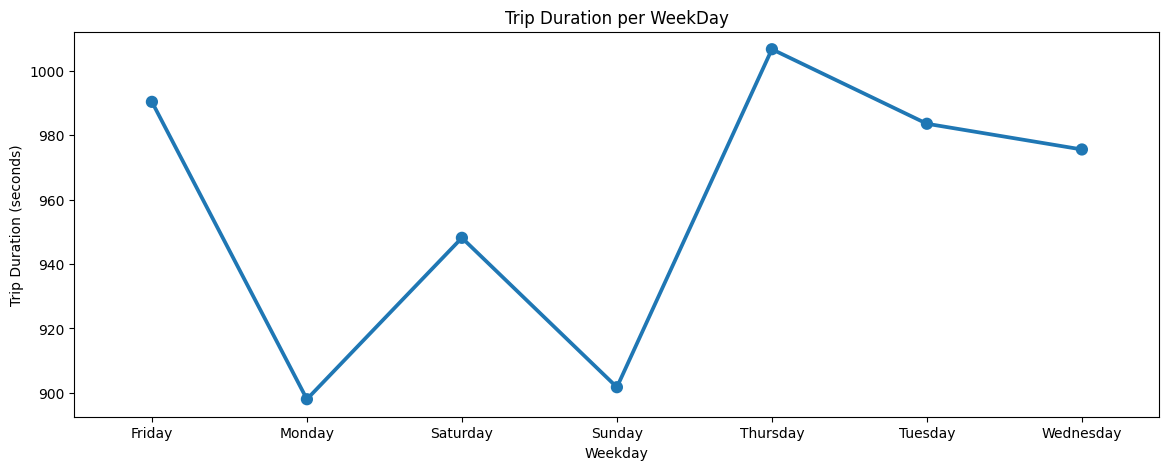

In [132]:
# Chart - 11 visualization code
plt.figure(figsize = (14,5))
group2 = df.groupby('weekday').trip_duration.mean()
sns.pointplot(x=group2.index, y=group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart to visualize the mean trip duration for each day of the week. This enables us to analyze how trip durations vary based on the day of the week and identify if there are any days with particularly higher or lower durations than others.

##### 2. What is/are the insight(s) found from the chart?

The graph illustrates the pattern of average trip duration across the week. The data suggests that trip durations tend to increase from Monday to Thursday, followed by a gradual decrease leading up to Sunday. While there are minor variations in the range of 0-1000 seconds, Thursday stands out with the highest average trip duration compared to the other days.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

One potential solution is to increase the number of available drivers during weekdays when the trip duration tends to be longer, as this could help to meet the higher demand and improve customer satisfaction and revenue. Fortunately, there do not appear to be any negative trends in the data that could result in reduced growth or revenue.

#### Chart - 12 Trip duration per Month (Bivariate Analysis)

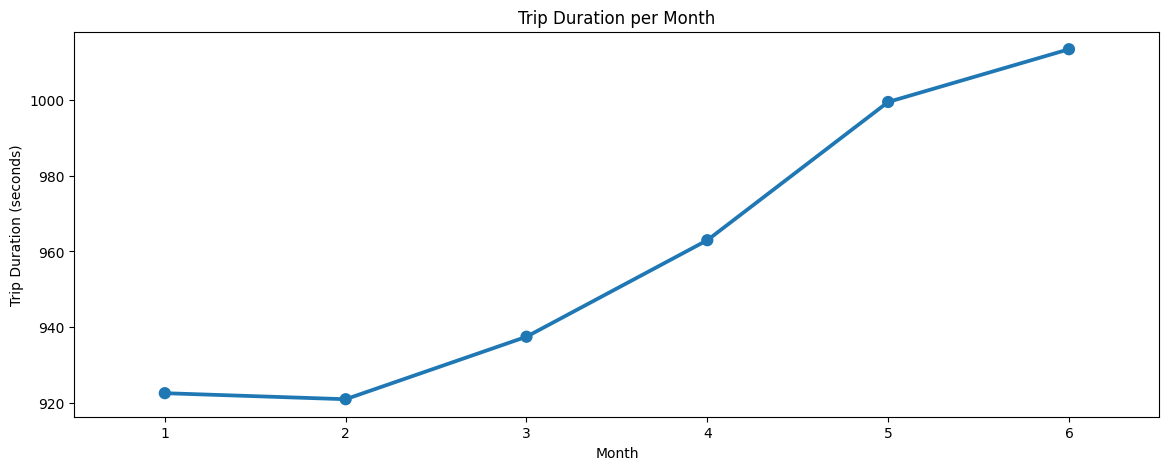

In [133]:
# Chart - 12 visualization code
plt.figure(figsize = (14,5))
group3 = df.groupby('month').trip_duration.mean()
sns.pointplot(x=group3.index, y=group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.title('Trip Duration per Month')
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to display the average trip duration for each month, which can help to identify any possible trends or patterns in trip duration across the year.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates a gradual increase in the average trip duration over a period of six months, with the lowest duration observed in February. The difference in duration between each month is not significant. This suggests that there may be some seasonal factors, such as wind or rain, that could be contributing to the increase in trip duration. For instance, May is typically the wettest month in NYC, which coincides with the visualization, as traffic congestion and longer travel times can be expected during rainy weather. These insights can be used to prepare for potential seasonal fluctuations in demand for the taxi service and optimize route planning accordingly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information from the chart can have a positive impact on the business by allowing for better resource optimization and service improvements during months with the highest average trip duration.

#### Chart - 13 Trip duration per vendor (Bivariate Analysis)

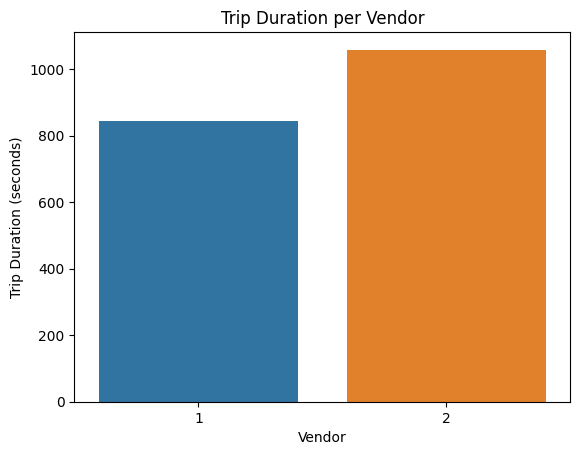

In [134]:
# Chart - 13 visualization code
group4 = df.groupby('vendor_id').trip_duration.mean()
sns.barplot(x=group4.index, y=group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.title('Trip Duration per Vendor')
plt.show()

##### 1. Why did you pick the specific chart?

The purpose of selecting a bar plot in this scenario is to compare the average trip duration of each vendor and to determine which vendor has the shortest or longest trip duration. This visualization method presents the data in a clear and straightforward manner, allowing for easy identification of patterns and trends.

##### 2. What is/are the insight(s) found from the chart?

Vendor 2 has a slightly higher average trip duration than Vendor 1, with a difference of only 200 seconds. Therefore, Vendor 2 can be considered the top performer in terms of trip duration.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By comparing the average trip duration of the two vendors, the business can gain insights into their respective service efficiencies and identify which one is better suited for meeting customer demands. This can lead to increased customer satisfaction and loyalty, resulting in a positive impact on the business's overall performance.

####Chart - 14 Distance per hour (Bivariate Analysis)

Let's analyze the distribution of distance with respect to various factors and examine if the duration of the trip is directly proportional to the distance, disregarding traffic and other road conditions. To visualize this, we can break down the data by hour. Additionally, as we have already conducted an outlier analysis on this variable, we can use the mean as an aggregate measure for our visualizations.

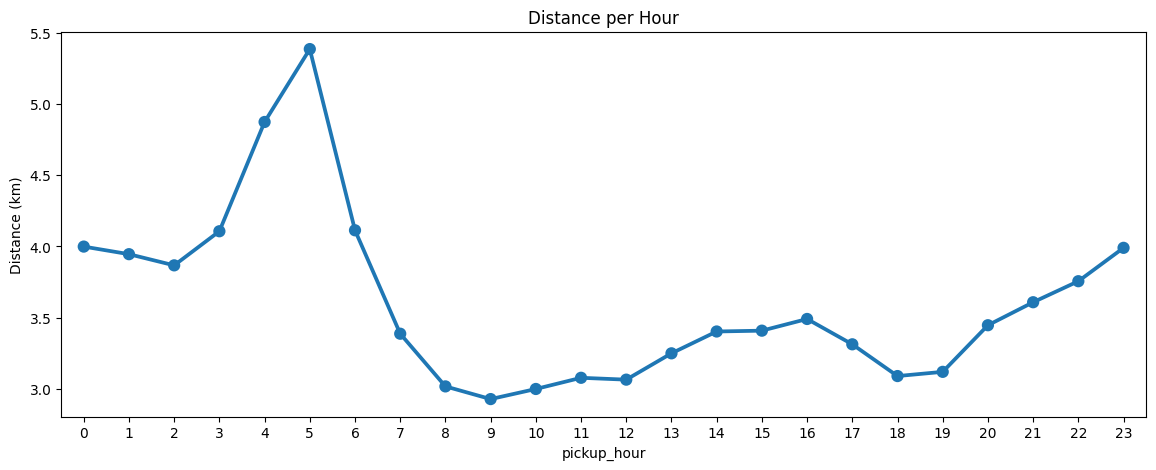

In [135]:
# Chart - 14 visualization code
plt.figure(figsize = (14,5))
group5 = df.groupby('pickup_hour').distance.mean()
sns.pointplot(x=group5.index, y=group5.values)
plt.ylabel('Distance (km)')
plt.title('Distance per Hour')
plt.show()
     


#####1. Why did you pick the specific chart?

The purpose of this chart is to examine how the average distance of taxi trips varies by hour of the day. The y-axis displays the average distance in kilometers, while the x-axis represents the hour of the day. To depict the average value at each hour, a pointplot is utilized.

#####2. What is/are the insight(s) found from the chart?

During the early morning hours, the distance traveled on taxi trips tends to be the highest, and this could be attributed to several factors, such as outstation trips taken on weekends and longer trips to the city airport, which is located on the outskirts of the city. From morning until evening, the trip distance remains fairly consistent, typically ranging from 3 to 3.5 kilometers. However, as the night progresses, the distance traveled gradually increases, peaking during the late night hours, before steeply decreasing towards the morning.

#####3. Will the gained insights help creating a positive business impact?

This chart has the potential to generate favorable business outcomes by shedding light on periods of increased demand for longer taxi trips, enabling the company to allocate resources accordingly. However, if the business primarily operates in a city where short trips are the norm and demand for longer trips is minimal, relying too heavily on these insights could have a detrimental effect on growth.

####Chart - 15 Distance per WeekDay (Bivariate Analysis)

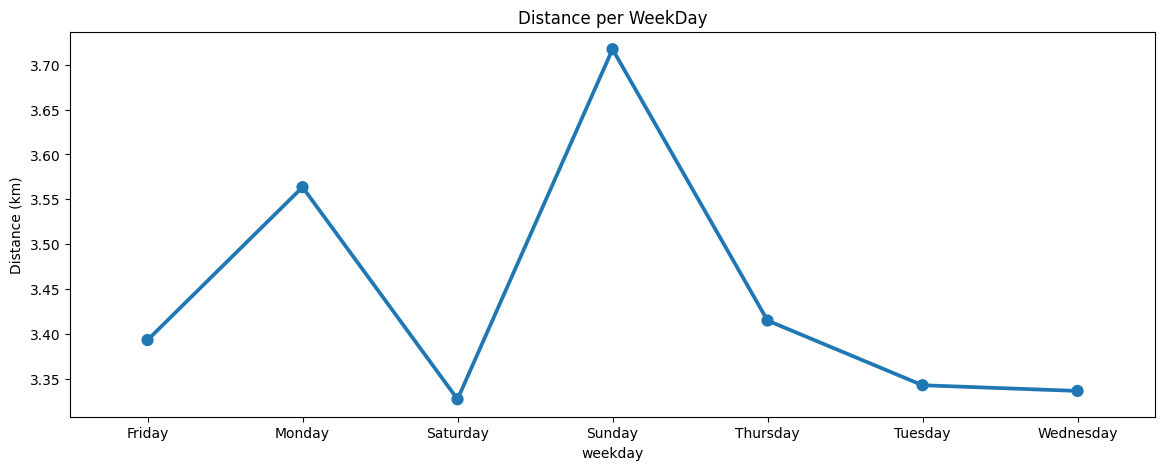

In [136]:
# Chart - 15 visualization code
plt.figure(figsize = (14,5))
group6 = df.groupby('weekday').distance.mean()
sns.pointplot(x=group6.index,y=group6.values)
plt.ylabel('Distance (km)')
plt.title('Distance per WeekDay')
plt.show()

#####1. Why did you pick the specific chart?

The purpose of selecting this chart was to present the average distance covered by taxis on a daily basis, which can offer valuable insights into travel demand trends for each day. This information can aid in making strategic decisions regarding vehicle deployment and staffing levels. Furthermore, the chart provides a comprehensive view of the distance distribution over the course of the week, facilitating the identification of patterns and enabling stakeholders to make informed predictions about future demand.

#####2. What is/are the insight(s) found from the chart?

The average distance metric is fairly evenly distributed with values ranging around 3.5 km. It is observed that the highest average distance is recorded on Sundays, which could be due to out-of-town trips or night trips to the airport.

####3. Will the gained insights help creating a positive business impact?

Taxi companies can leverage the data on average distance traveled per weekday to optimize resource allocation. For instance, if Sundays have a higher average distance traveled, the company can take steps to ensure that there are adequate taxis available to meet the demand for longer trips. This proactive approach can help to mitigate the risk of lost business resulting from insufficient taxi availability during periods of high demand.

####Chart - 16 Distance per Month (Bivariate Analysis)

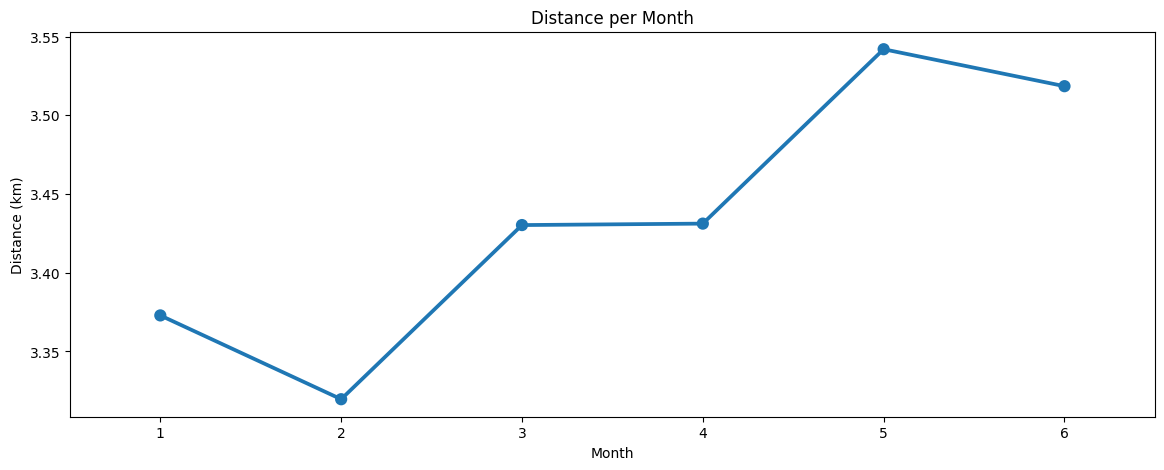

In [137]:
# Chart - 16 visualization code
plt.figure(figsize = (14,5))
group7 = df.groupby('month').distance.mean()
sns.pointplot(x=group7.index, y=group7.values)
plt.ylabel('Distance (km)')
plt.xlabel('Month')
plt.title('Distance per Month')
plt.show()
     

#####1. Why did you pick the specific chart?

I selected this particular chart to depict the mean distance traveled per month, as it enables us to visualize any seasonal fluctuations and identify overall trends in taxi distance coverage throughout the year. The point plot used in this chart offers a concise illustration of the mean value for each month, along with the confidence interval that provides a sense of the data's variability. This presentation format enables us to observe patterns in the data over the year, while also highlighting any outliers that may exist.

#####2. What is/are the insight(s) found from the chart?

The average distance metric exhibits a degree of consistency, hovering at approximately 3.5 km and displaying minimal fluctuations. However, there is some variability observed, with the highest average distance occurring in the fifth month and the lowest in the second month.

#####3. Will the gained insights help creating a positive business impact?

Determining whether the insights derived from this chart will have a positive or negative impact on business growth is challenging. While the stable average distance metric implies consistent demand for taxi services throughout the year, it is difficult to predict the impact of this on taxi companies. While they can leverage this information to plan their operations, the slight fluctuations in the average distance metric over the year could be influenced by factors like seasonality or holidays, which may impact the demand for taxi services. A proactive response from taxi companies to such demand fluctuations could potentially lead to benefits from changes in the market.

####Chart - 17 Distance per Vendor (Bivariate Analysis)

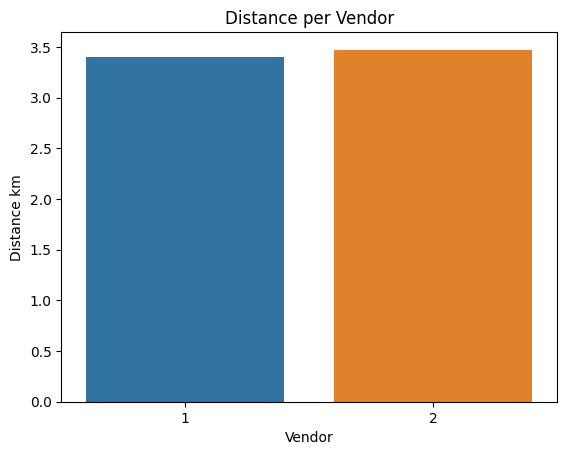

In [138]:
# Chart - 17 visualization code
group8 = df.groupby('vendor_id').distance.mean()
sns.barplot(x=group8.index,y=group8.values)
plt.ylabel("Distance km")
plt.xlabel("Vendor")
plt.title('Distance per Vendor')
plt.show()
     

#####1. Why did you pick the specific chart?

To compare the average distance traveled per trip by different vendors and identify which vendor covers the most distance on average, a bar plot was employed as the visualization tool. This enables us to detect any discernible variations in the average distance traveled by trips provided by different vendors.

#####2. What is/are the insight(s) found from the chart?

Observing the average distance covered by both vendors reveals that there is little variation and the distance covered is roughly the same. However, this observation alone does not provide much additional insight.

#####3. Will the gained insights help creating a positive business impact?

The plot depicting the average distance covered by both vendors reveals no significant insights that could indicate a positive or negative business impact. While it is observed that the average distance covered by both vendors is similar with little variation, this observation does not provide any specific advantage or disadvantage for either vendor. It may be necessary to conduct a more comprehensive analysis that includes additional factors, such as pickup and drop-off locations, time of day, and passenger count, to gain a deeper understanding of the business impact. Without further context, it is difficult to draw any meaningful conclusions from this plot alone.

####Chart - 18 Distance v/s Trip duration (Bivariate Analysis)

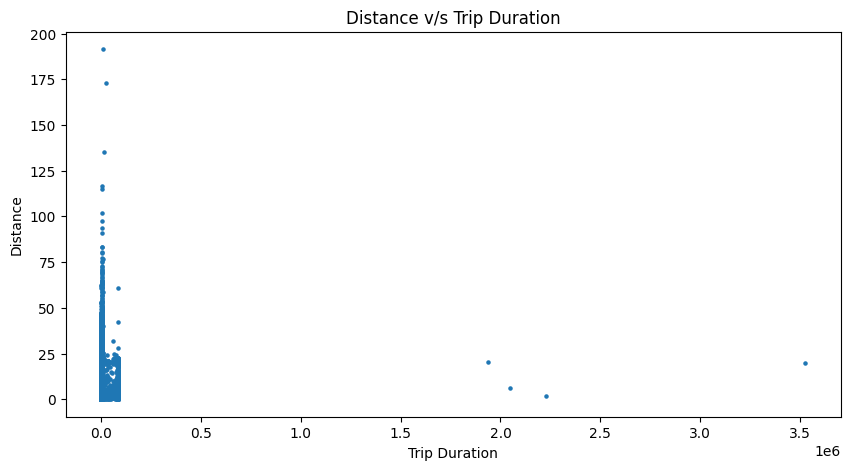

In [139]:
# Chart - 18 visualization code
plt.figure(figsize = (10,5))
plt.scatter(df.trip_duration, df.distance , s=5, alpha=1)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

The graph reveals an interesting trend where a considerable number of trips had a short distance but took longer than 20,000 seconds to complete. At first glance, it appears that the duration of the trip is related to the distance covered, but this relationship becomes weaker as the distance increases.

In addition, there are a few anomalies in the data, where a few trips cover a distance of approximately 200 km in a very brief period, which seems unrealistic and should be treated as outliers.

To gain more insights, let's narrow our focus on the portion of the graph where the distance is less than 50 kmph and the duration is less than 1000 seconds.

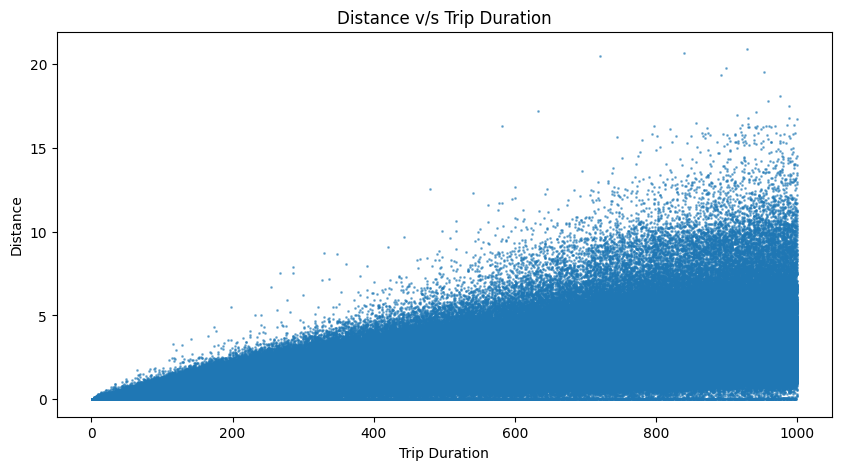

In [140]:
plt.figure(figsize = (10,5))
dur_dist = df.loc[(df.distance < 50) & (df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()
     

#####1. Why did you pick the specific chart?

I selected this chart to explore the potential correlation between the distance covered by a trip and its duration. By plotting the data points as a scatter plot, we can easily visualize any patterns or trends that may exist between these two variables. The chart is focused on trips with a distance of less than 50 km and a trip duration of less than 1000 seconds, which helps to remove any outliers that could skew the relationship between distance and duration. This allows us to gain valuable insights into the potential correlation between these two variables and draw conclusions about the relationship between distance and trip duration.

#####2. What is/are the insight(s) found from the chart?

The chart suggests that the expected linear correlation between distance covered and trip duration is disrupted by a cluster of trips in the lower right corner, indicating some irregularities in the data.

To improve the data quality for predictive modeling, it may be necessary to filter out trips that had a duration of more than a minute but covered no distance, as they are likely to be cancelled trips that should not have taken any time.

#####3. Will the gained insights help creating a positive business impact?

By improving the consistency and accuracy of the data through the removal of trips that covered no distance but lasted more than a minute, the insights gained from the correlation between distance and trip duration can have a positive impact on business growth. This can lead to the development of more accurate predictive models, which can help optimize operations and reduce costs. Therefore, this analysis can be seen as a step towards positive growth, with the potential to improve performance and drive success.

####Chart - 19 Average speed per hour (Bivariate Analysis)

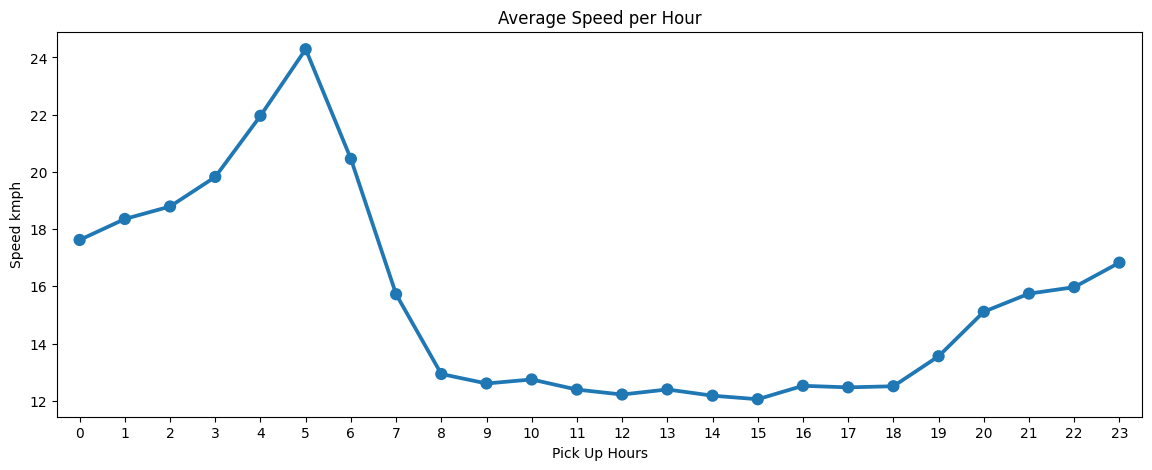

In [141]:
# Chart - 19 visualization code
plt.figure(figsize = (14,5))
group9 = df.groupby('pickup_hour').speed.mean()
sns.pointplot(x=group9.index, y=group9.values)
plt.xlabel('Pick Up Hours')
plt.ylabel('Speed kmph')
plt.title('Average Speed per Hour')
plt.show()

#####1. Why did you pick the specific chart?

I chose this chart because it effectively represents the relationship between pickup hours and average speed using a point plot. The x-axis displays the pickup hours, a continuous variable, while the y-axis displays the corresponding average speed of the trips. This enables us to observe how the average speed changes throughout the day and identify any trends or patterns that may exist.

#####2. What is/are the insight(s) found from the chart?

The chart displays a clear pattern of the average taxi speed over the pickup hours of the day. The average speed tends to increase gradually from late night until early morning, peaking at 5 AM. However, the morning rush hour causes a sudden drop in average speed. Throughout the office hours from 8 AM to 6 PM, the average speed remains consistent.

#####3. Will the gained insights help creating a positive business impact?

The insight gained from the average speed of taxis can be beneficial to companies in many ways. For example, it can help improve dispatch algorithms by predicting the speed at which taxis are moving. Furthermore, it can be used to enhance the accuracy of estimated time of arrival (ETA) predictions for passengers.

However, it is essential to acknowledge that there are external factors that can influence taxi speed, such as traffic congestion, weather conditions, and road construction. Thus, these factors should be considered when interpreting this data and making business decisions. Nevertheless, this insight does not have any direct negative impact on growth.

####Chart - 20 Average speed per weekday (Bivariate Analysis)

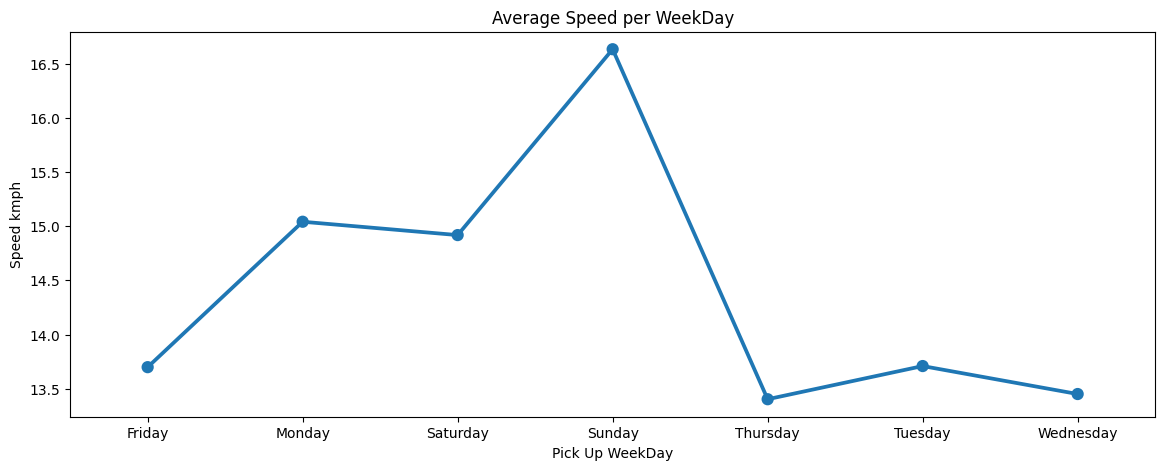

In [142]:
# Chart - 20 visualization code
plt.figure(figsize = (14,5))
group10 = df.groupby('weekday').speed.mean()
sns.pointplot(x=group10.index,y= group10.values)
plt.xlabel('Pick Up WeekDay')
plt.ylabel('Speed kmph')
plt.title('Average Speed per WeekDay')
plt.show()

#####1. Why did you pick the specific chart?

I selected this chart with the aim of comprehending how the day of the week on which pickups are made relates to the average speed of trips. This data could prove valuable in forecasting traffic patterns, enabling better route planning to reduce travel time, and enhancing the overall experience for drivers and passengers.

#####2. What is/are the insight(s) found from the chart?

Typically, taxis tend to have a higher average speed on weekends in comparison to weekdays due to a decrease in rush hour traffic during those days. Despite this trend, Monday's average speed is unexpectedly high, possibly due to factors such as early morning travelers returning from out-of-town trips before office hours or travelers arriving from the airport after a vacation. It's possible that other local factors may also play a role in this pattern, and it's worth noting that anomalies in the data may exist, which could be challenging to identify in a dataset of this size.

#####3. Will the gained insights help creating a positive business impact?

The average speed chart can provide valuable insights to the taxi business regarding travel patterns, such as the trend of higher speeds on weekends and Mondays, which can aid in more efficient resource allocation of cars and drivers to meet the demand.

Furthermore, analyzing the underlying causes behind these patterns, such as rush hour traffic or returning travelers, can enable the company to develop solutions that improve customer satisfaction and increase efficiency. Ultimately, the information gained from the average speed chart has the potential to positively impact the taxi business and enhance the overall travel experience for passengers.

####Chart - 21 Passenger count per vendor (Bivariate Analysis)

Our analysis will now focus on the passenger count metric, which is a whole number and does not require a ratio like the other metrics. To observe its distribution, we will create a plot comparing it solely against the vendor, and use the mean as the aggregate measure. This is due to our prior outlier analysis of the metric, which assures us that extreme values will not impact our results. Using the median would not be informative since the majority of trips only had one passenger. Let's delve into the distribution of this metric.

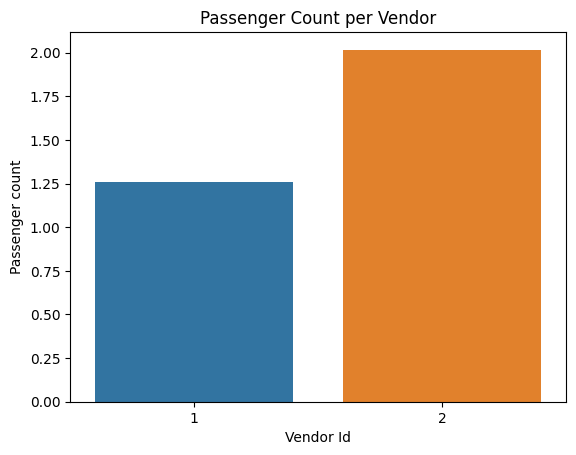

In [143]:
# Chart - 21 visualization code
group9 = df.groupby('vendor_id').passenger_count.mean()
sns.barplot(x=group9.index, y=group9.values)
plt.ylabel('Passenger count')
plt.xlabel('Vendor Id')
plt.title('Passenger Count per Vendor')
plt.show()

#####1. Why did you pick the specific chart?

To visualize the average passenger count per vendor, I opted for a bar plot. By utilizing this plot, we can compare the mean passenger count of both vendors and easily determine which one serves more passengers on average.

#####2. What is/are the insight(s) found from the chart?

There is a notable distinction between the two providers in terms of the average passenger count across all trips. On average, trips taken with Vendor 2 have 2 passengers, whereas those with Vendor 1 typically only have 1 passenger. To gain a more comprehensive understanding, let's delve deeper.

It appears that Vendor 2 has a larger market share, likely due to their ability to accommodate more passengers in larger vehicles, such as minivans. This is evident from the fact that Vendor 2 has a higher frequency of trips with multiple passengers, while Vendor 1 predominantly serves single-passenger trips.

#####3. Will the gained insights help creating a positive business impact?

Undoubtedly, the insights obtained from analyzing the average passenger count can be of great benefit to the business. By comprehending the discrepancies in the passenger count between the two vendors, the company can make informed decisions on which vendor to select for specific types of trips. For instance, if the company needs to transport a group of passengers, Vendor 2 would be the optimal choice, considering their vehicles can accommodate more passengers. Conversely, if the company needs to transport an individual passenger, Vendor 1 would be a more appropriate option.

####Chart - 22 Pick Up Points v/s Dropoff Points (Bivariate Analysis)

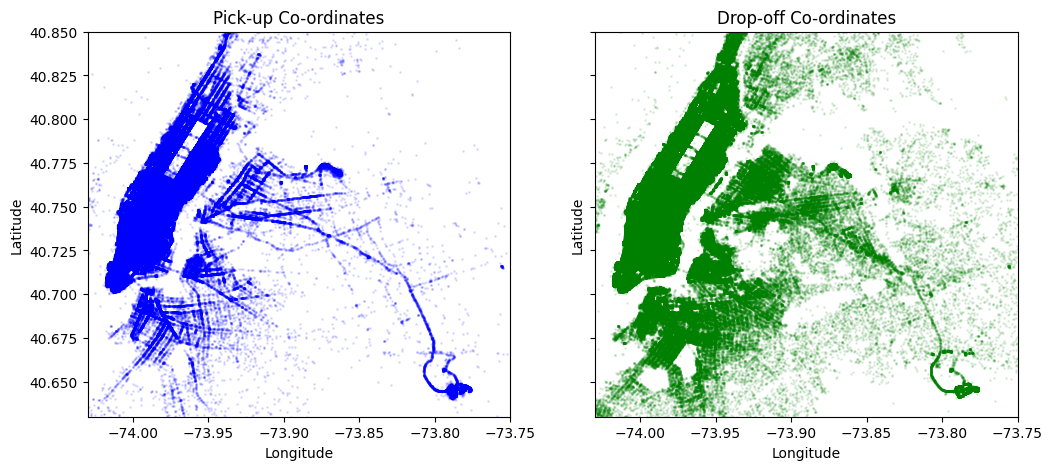

In [144]:
# Chart - 22 visualization code
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize = (12,5))
ax[0].scatter(df['pickup_longitude'].values, df['pickup_latitude'].values,
color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(df['dropoff_longitude'].values, df['dropoff_latitude'].values,
color='green', s=1, label='train', alpha=0.1)
ax[1].set_title('Drop-off Co-ordinates')
ax[0].set_title('Pick-up Co-ordinates')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

#####1. Why did you pick the specific chart?

I opted for a particular chart to visualize the pickup and drop-off coordinates of the taxi trips in the dataset. This chart displays the latitude and longitude coordinates on the x and y axis, respectively. By utilizing this chart, we can gain valuable insight into the geographical distribution of the pickup and drop-off points, thereby providing us with an understanding of the transportation patterns and trends in the city. Moreover, as the chart is a scatter plot, it enables us to observe the density of the pickup and drop-off points, and identify any anomalies or outliers.

#####2. What is/are the insight(s) found from the chart?

Upon analyzing the pickup plot, we can deduce that the majority of pickups are concentrated in the Manhattan area, suggesting that it is a densely populated area for pickups. On the other hand, the drop-off locations have a more widespread distribution. It's worth noting that the previously calculated average distance of the trips, which was 3.5 km, may explain why the drop-off locations are primarily located within Manhattan.

#####3. Will the gained insights help creating a positive business impact?

Indeed, the insights gained from the analysis of the taxi service usage patterns can have a positive impact on the business by enabling the company to optimize its resources and improve customer service. For instance, identifying the peak hours of service usage and popular pickup and drop-off locations can help the company make informed decisions about deploying more taxis in high demand areas during peak hours, thus increasing efficiency and reducing wait times for customers. By doing so, the company can improve the overall customer experience, which can lead to increased customer loyalty and ultimately, higher profitability.

#### Chart - 23 - Correlation Heatmap(Multivariate Analysis)

In [145]:
# Correlation Heatmap visualization code
df.corr()

vendor_id  passenger_count  pickup_longitude  \
vendor_id               1.00             0.29              0.01   
passenger_count         0.29             1.00              0.00   
pickup_longitude        0.01             0.00              1.00   
pickup_latitude         0.00            -0.00              0.02   
dropoff_longitude       0.00            -0.00              0.79   
dropoff_latitude        0.00            -0.00              0.10   
trip_duration           0.02             0.01              0.03   
weekday_num             0.00             0.03             -0.02   
month                  -0.01            -0.00              0.00   
pickup_hour             0.01             0.01              0.01   
pickup_minute          -0.00             0.00             -0.00   
distance                0.01             0.01              0.28   
speed                   0.00            -0.00              0.16   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
vendor_id                     0.00               0.00              0.00   
passenger_count              -0.00              -0.00             -0.00   
pickup_longitude              0.02               0.79              0.10   
pickup_latitude               1.00               0.12              0.50   
dropoff_longitude             0.12               1.00              0.15   
dropoff_latitude              0.50               0.15              1.00   
trip_duration                -0.03               0.02             -0.02   
weekday_num                  -0.03              -0.00             -0.02   
month                        -0.00               0.00             -0.00   
pickup_hour                   0.01              -0.02              0.01   
pickup_minute                 0.00              -0.00              0.00   
distance                     -0.29               0.19             -0.15   
speed                        -0.11               0.15              0.02   

                   trip_duration  weekday_num  month  pickup_hour  \
vendor_id                   0.02         0.00  -0.01         0.01   
passenger_count             0.01         0.03  -0.00         0.01   
pickup_longitude            0.03        -0.02   0.00         0.01   
pickup_latitude            -0.03        -0.03  -0.00         0.01   
dropoff_longitude           0.02        -0.00   0.00        -0.02   
dropoff_latitude           -0.02        -0.02  -0.00         0.01   
trip_duration               1.00        -0.00   0.01         0.00   
weekday_num                -0.00         1.00  -0.01        -0.08   
month                       0.01        -0.01   1.00        -0.00   
pickup_hour                 0.00        -0.08  -0.00         1.00   
pickup_minute              -0.00         0.00  -0.00        -0.00   
distance                    0.10         0.01   0.02        -0.02   
speed                      -0.03         0.07  -0.03        -0.10   

                   pickup_minute  distance  speed  
vendor_id                  -0.00      0.01   0.00  
passenger_count             0.00      0.01  -0.00  
pickup_longitude           -0.00      0.28   0.16  
pickup_latitude             0.00     -0.29  -0.11  
dropoff_longitude          -0.00      0.19   0.15  
dropoff_latitude            0.00     -0.15   0.02  
trip_duration              -0.00      0.10  -0.03  
weekday_num                 0.00      0.01   0.07  
month                      -0.00      0.02  -0.03  
pickup_hour                -0.00     -0.02  -0.10  
pickup_minute               1.00     -0.01  -0.00  
distance                   -0.01      1.00   0.56  
speed                      -0.00      0.56   1.00

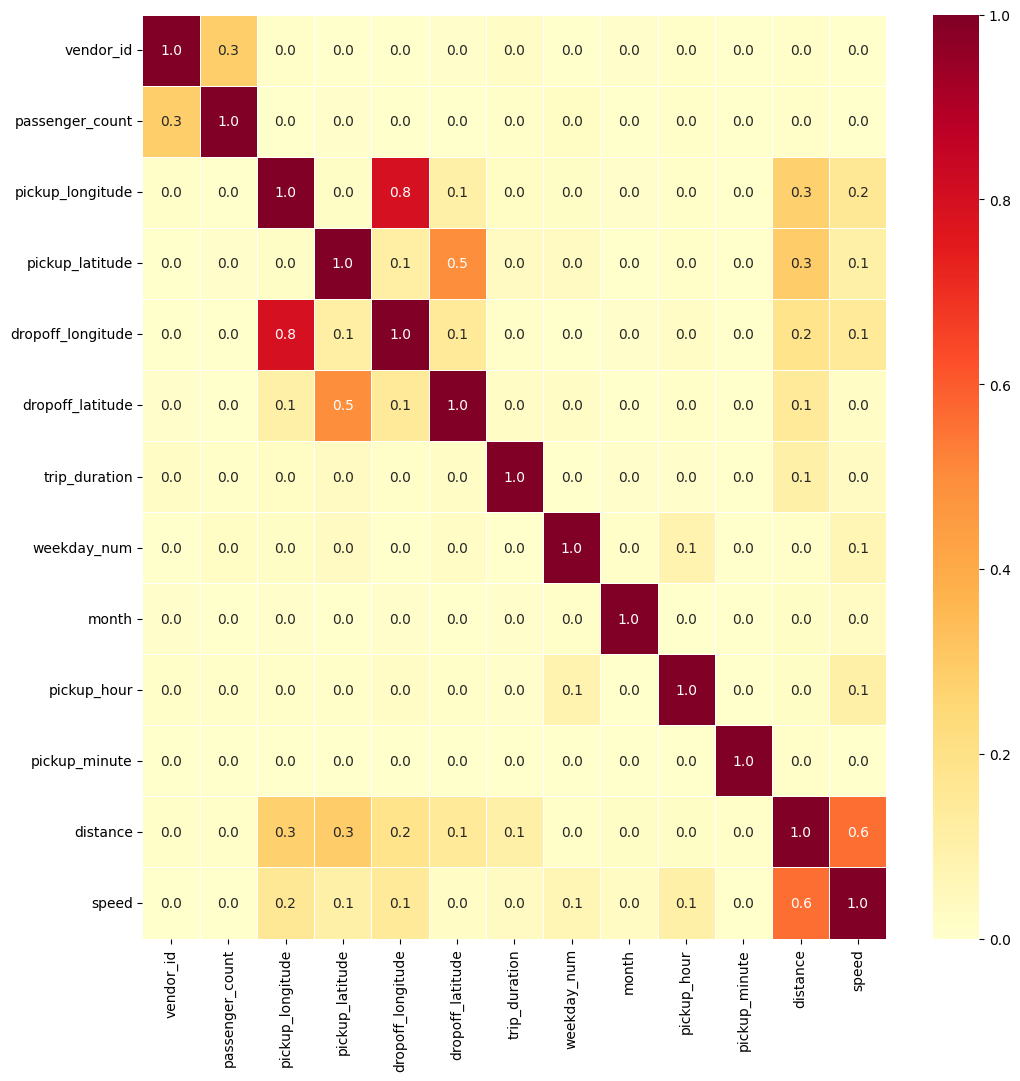

In [146]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(round(df.corr(),3)), annot=True, linewidths=.5, fmt= '.1f', cmap='YlOrRd', ax=ax)
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap was chosen for its ability to visually represent the correlations between variables in the dataset in a concise and informative manner. Correlation is a statistical measure that reveals how two or more variables are related and how they change in relation to each other.

Using the heatmap, we can easily visualize the strength and direction of the correlations between the variables, which allows us to identify highly correlated variables as well as those that are not. By doing so, we can gain a better understanding of the data and potentially uncover important relationships that may have been otherwise difficult to identify.

##### 2. What is/are the insight(s) found from the chart?

The passenger count and vendor ID exhibit a positive correlation of 30%.

There is a strong positive correlation of 80% between the dropoff longitude and pickup longitude.

The dropoff latitude and pickup latitude have a moderate positive correlation of 50%.

There is a weak correlation of 3% between trip duration and pickup longitude.

Trip duration and pickup latitude have a weak negative correlation of 3%.

There is a weak correlation of 30% between distance and pickup longitude.

Speed shows a weak correlation of 10-20% with both pickup and dropoff longitude.

There is a strong positive correlation of 60% between speed and distance.

Trip duration is positively correlated with distance with a correlation of 10%.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: Weekends has more traffic as compared to week days.

Hypothesis 2: Traffic hours on weekdays are different than traffic hours on weekends.

Hypothesis 3: Passengers which are travelling at a time is changing with change in vendor.

### Hypothetical Statement -  1 Weekends has more traffic as compared to week days.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : mean of count of trips on weekday <= mean of mean of count of trips on weekend day

H1 : mean of count of trips on weekday > mean of mean of count of trips on weekend day

#### 2. Perform an appropriate statistical test.

In [147]:
# Perform Statistical Test to obtain P-Value

In [148]:
df['pickup_date'] = pd.to_datetime(df["pickup_datetime"]).dt.normalize()
     

In [149]:
dfweekday = pd.DataFrame(df.pickup_date.value_counts())
dfweekday.reset_index(inplace=True)
dfweekday.rename(columns={'index':'date','pickup_date':'count'},inplace=True) 

dfweekday['pickup_weekday'] = dfweekday.apply(lambda row: row['date'].strftime("%A"),axis=1) #Monday=1
dfweekday.head(4)

cnt = list(dfweekday['count'])
weekday = list(dfweekday['pickup_weekday'])
     

In [150]:
weekd = []
weekn = []
for i in range(len(cnt)):
  if weekday[i] in ['Saturday','Sunday']:
    weekn.append(cnt[i])
  else:
    weekd.append(cnt[i])

In [151]:
from scipy.stats import ttest_ind  
    
def t_test(x,y,alternative='both-sided'):
        _, double_p = ttest_ind(x,y,equal_var = False)
        if alternative == 'both-sided':
            pval = double_p
        elif alternative == 'greater':
            if np.mean(x) > np.mean(y):
                 pval = double_p/2.
            else:
                 pval = 1.0 - double_p/2.
        elif alternative == 'less':
            if np.mean(x) < np.mean(y):
                 pval = double_p/2.
            else:
              pval = 1.0 - double_p/2.

        op = 'Hence we are failed to reject null hypothesis (H0) for significane level 0.05'
        if pval < 0.05:
          op = 'Hence we are rejecting null hypothesis (H0) for significane level 0.05 '
        return (f'P-Value: {pval}, {op}')

In [152]:
t_test(x=weekn,y=weekd,alternative='greater')

'P-Value: 0.5277410999247822, Hence we are failed to reject null hypothesis (H0) for significane level 0.05'

##### Which statistical test have you done to obtain P-Value?

The code utilizes a two-sample t-test, which is a statistical test that compares the means of two independent samples. The p-value is computed using the ttest_ind function from the scipy.stats module.

The output of the function provides the p-value as well as a statement indicating whether the null hypothesis, which states that the means of the two samples are equal, can be rejected or not at a significance level of 0.05 based on the obtained p-value.

##### Why did you choose the specific statistical test?

The code uses the two-sample t-test, a statistical method suitable for comparing the means of two distinct datasets. This test is widely used to compare the means of two groups, especially when the sample size is small and the standard deviation of the population is not known. To perform this test, the code utilizes the ttest_ind function from the scipy.stats module.

### Hypothetical Statement - 2 Traffic hours on weekdays are different than traffic hours on weekends.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : Traffic hours on weekdays are same as traffic hours on weekends.

H1 : Traffic hours on weekdays are different than traffic hours on weekends.

#### 2. Perform an appropriate statistical test.

In [153]:
# Perform Statistical Test to obtain P-Value

In [154]:
dftraffic = df[['weekday','pickup_hour']]
weekd = []
for i in dftraffic['weekday']:
  if i in ['Saturday','Sunday']:
    weekd.append('Weekend')
  else:
    weekd.append('Weekday')
dftraffic['weekd'] = weekd
dftraffic.head(3)

weekday  pickup_hour    weekd
0   Monday           17  Weekday
1   Sunday            0  Weekend
2  Tuesday           11  Weekday

In [155]:
new = pd.crosstab(dftraffic.pickup_hour,dftraffic.weekd)
new = pd.DataFrame(new)
new.reset_index(inplace=True)
new['Total'] = new['Weekday'] + new['Weekend']
new = new.iloc[0:24,:]
new.set_index('pickup_hour',inplace=True)
new.loc['Total'] = new.iloc[:, :].sum()
new

weekd        Weekday  Weekend    Total
pickup_hour                           
0              29202    24035    53237
1              17719    20847    38566
2              11150    16820    27970
3               7989    12900    20889
4               7439     8349    15788
5              11042     3957    14999
6              28559     4682    33241
7              49026     6571    55597
8              57237     9813    67050
9              53423    14233    67656
10             47346    18088    65434
11             48090    20376    68466
12             49998    21870    71868
13             49487    21979    71466
14             52824    21461    74285
15             50742    21059    71801
16             44494    19805    64299
17             54513    21964    76477
18             66570    24017    90587
19             67209    23093    90302
20             63703    20360    84063
21             64068    20109    84177
22             60228    20263    80491
23             50246    19530    69776
Total        1042304   416181  1458485

As we are analysing two categorical variables, here We are going to use chi-squre test of independance.

In [156]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = new.index.unique()
columns = new.columns.unique()
for i in columns:
    for j in rows:
        O = new[i][j]
        E = new[i]['Total'] * new['Total'][j] / new['Total']['Total']
        chi_square += (O-E)**2/E
     

In [157]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 71634.88186755347  and p value is: 0.0
Null Hypothesis is rejected.


Hypothesis 2 Conclusion: Traffic hours on weekdays are different than traffic hours on weekends.

##### Which statistical test have you done to obtain P-Value?

The performed statistical test in the code is a chi-square test of independence, which is useful for examining the association between two categorical variables. By analyzing the contingency table, the test calculates a p-value indicating the statistical significance of the association between the variables. A p-value below the chosen significance level (alpha) suggests that the variables are not independent, and the null hypothesis (that there is no association between the variables) can be rejected.

##### Why did you choose the specific statistical test?

The reason for choosing the chi-square test of independence was to assess the relationship between two categorical variables and determine whether or not they are statistically significant.

### Hypothetical Statement - 3 Passengers which are travelling at a time is changing with change in vendor.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : 'passenger_count' and 'vendor_id' has no relationship.

H1 : 'passenger_count' and 'vendor_id' has relationship.

#### 2. Perform an appropriate statistical test.

In [158]:
# Perform Statistical Test to obtain P-Value

As we are analysing two categorical variables, here We are going to use chi-squre test of independance.

In [159]:
new = pd.crosstab(df.passenger_count,df.vendor_id)
new = pd.DataFrame(new)
new.reset_index(inplace=True)
new['Total'] = new[1] + new[2]
new = new.iloc[1:7,:]
new.set_index('passenger_count',inplace=True)
new.loc['Total'] = new.iloc[:, :].sum()
new

vendor_id             1       2    Total
passenger_count                         
1                550762  482662  1033424
2                 92138  118162   210300
3                 22942   36946    59888
4                 11942   16460    28402
5                   344   77736    78080
6                   152   48176    48328
Total            678280  780142  1458422

In [160]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = new.index.unique()
columns = new.columns.unique()
for i in columns:
    for j in rows:
        O = new[i][j]
        E = new[i]['Total'] * new['Total'][j] / new['Total']['Total']
        chi_square += (O-E)**2/E
     

In [161]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 129651.33770781619  and p value is: 0.0
Null Hypothesis is rejected.


In [162]:
# The critical value approach
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 129651.33770781619  and critical value is: 21.02606981748307
Null Hypothesis is rejected.


Hypothesis 3 Conclusion: Passenger count and vendor id has relationship.

##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Chi-Square Test of Independence.

##### Why did you choose the specific statistical test?

The test operates by contrasting the observed frequencies in each category of the variables with the anticipated frequencies that would be observed if the variables were not related. Afterward, the resulting Chi-Square statistic is employed to determine a p-value, which is utilized to decide whether to accept or reject the null hypothesis. Specifically, the null hypothesis in this instance is that passenger_count and vendor_id are not interdependent variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [171]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
weekday_num           0
month                 0
pickup_hour           0
pickup_minute         0
weekday               0
distance              0
speed                 0
pickup_date           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Our analysis revealed that there are no missing values, so no records need to be imputed. However, there are several outliers present in the Speed, Distance, and Trip Duration columns.

### 2. Handling Outliers

In [172]:
# Handling Outliers & Outlier treatments

####PASSENGER COUNT

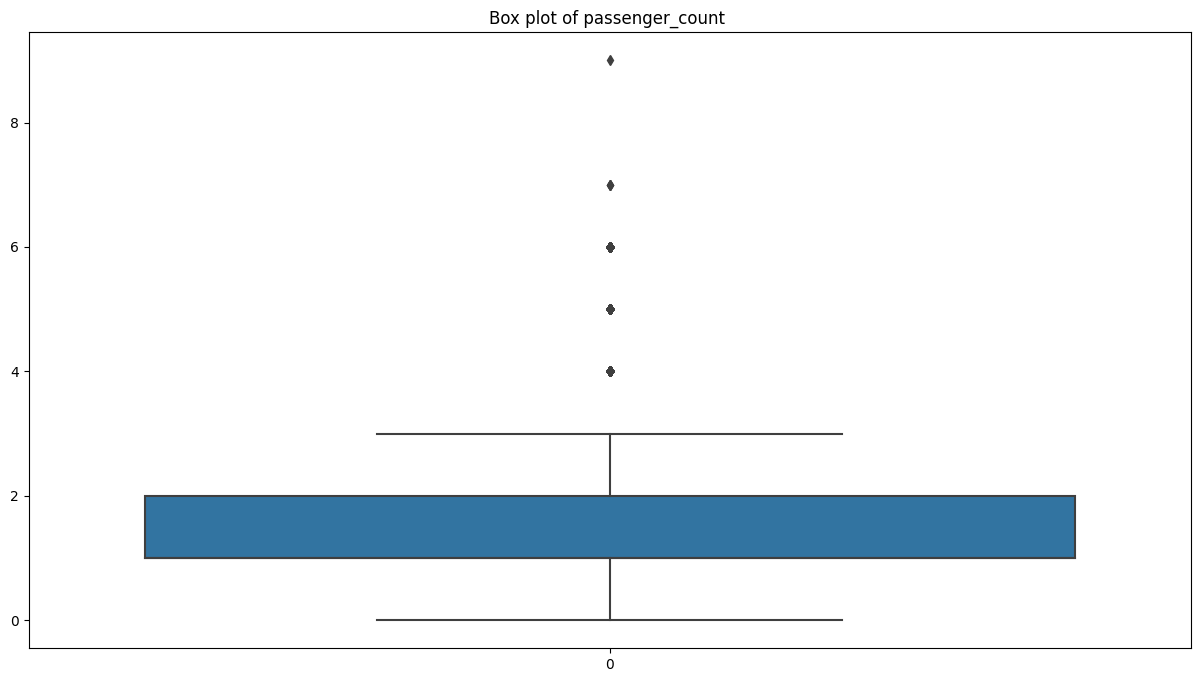

In [173]:
plt.figure(figsize=(15,8))
plt.title("Box plot of passenger_count ")
ax = sns.boxplot(data=df['passenger_count'])

In [174]:
percentile_q1_passenger_count = np.percentile(df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [175]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)
     

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [176]:
df=df[df['passenger_count'] > 0]

In [177]:
df=df[df['passenger_count'] < upper_limit_outlier_passenger_count]
     

In [178]:
df.shape

(1303612, 19)

####TRIP DURATION

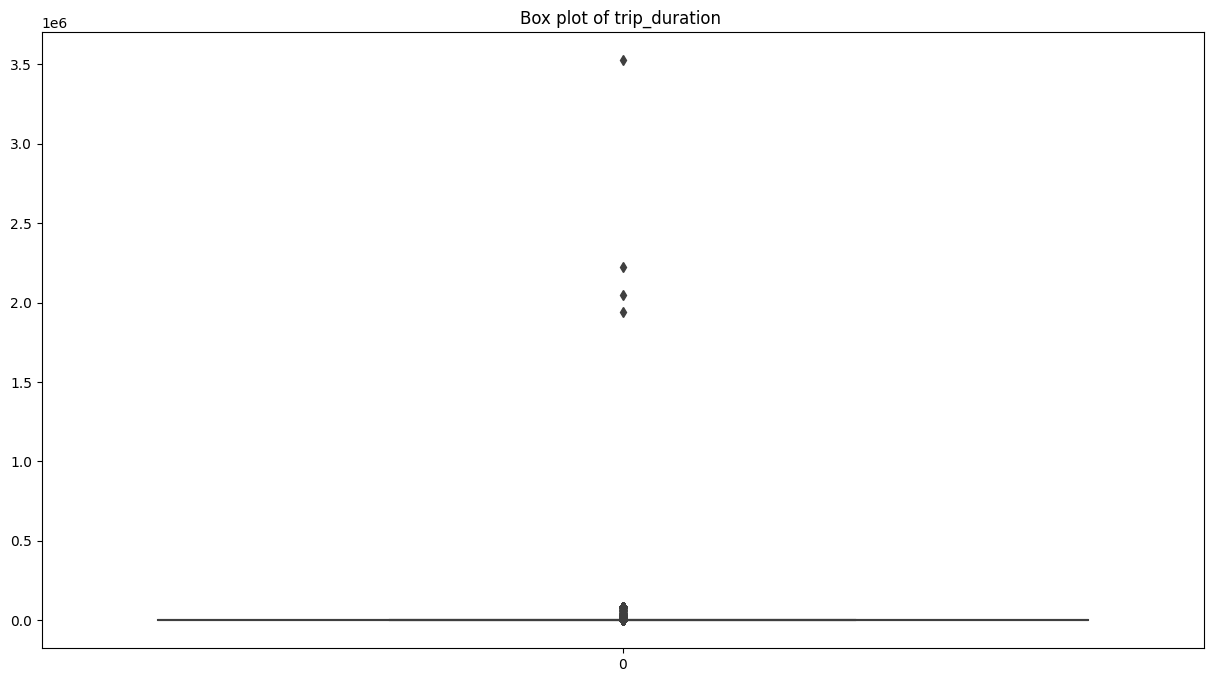

In [179]:
plt.figure(figsize=(15,8))
plt.title("Box plot of trip_duration ")
ax = sns.boxplot(data=df['trip_duration'], orient="v")

In [180]:
percentile_q1_trip_duration = np.percentile(df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(df['trip_duration'],75)
print(percentile_q3_trip_duration)

396.0
661.0
1073.0


In [181]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -619.5
Upper limit for outlier  : 2088.5


In [182]:
df=df[df['trip_duration'] > 0]
     

In [183]:
df=df[df['trip_duration'] < upper_limit_outlier_trip_duration]

In [184]:
df.shape

(1237588, 19)

####DISTANCE

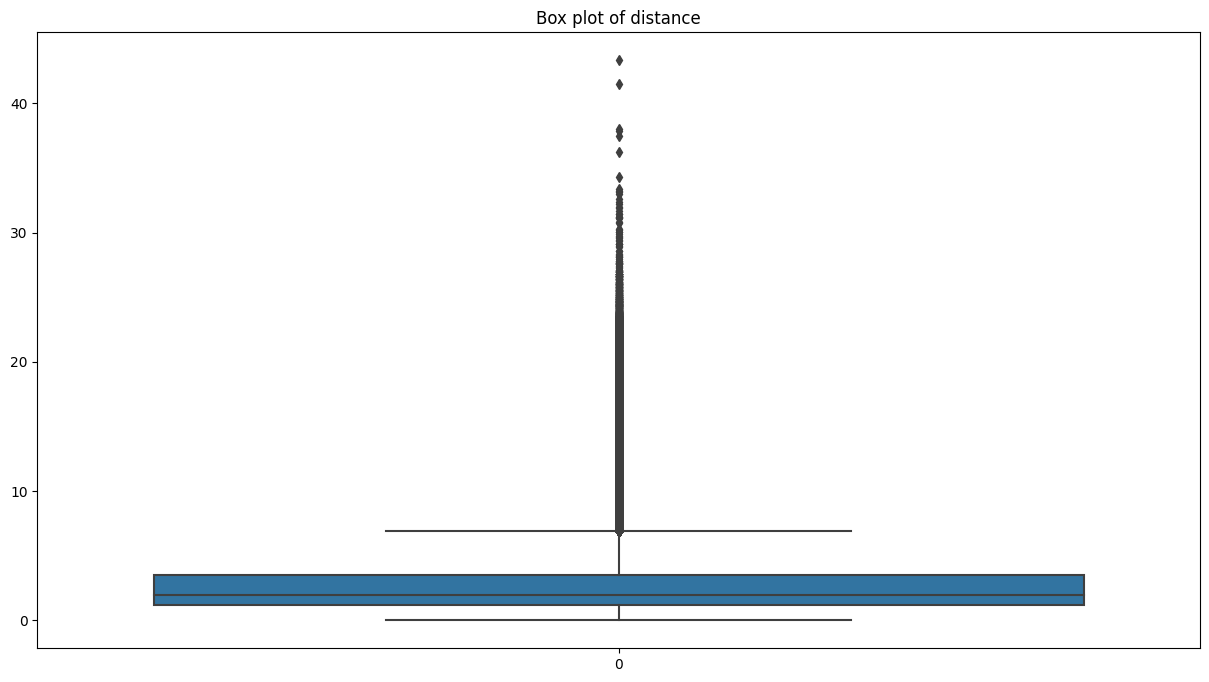

In [185]:
plt.figure(figsize=(15,8))
plt.title("Box plot of distance")
ax = sns.boxplot(data=df['distance'], orient="v")

In [186]:
percentile_q1 = np.percentile(df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['distance'],75)
print(percentile_q3)
     

1.1974715811283136
1.9916696602250628
3.4821996107358095


In [187]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.22962046328293
Upper limit for outlier  : 6.909291655147053


In [188]:
df=df[df['distance'] > lower_limit_outlier]
     

In [189]:
df=df[df['distance'] < upper_limit_outlier]
     

In [190]:
df.shape

(1141585, 19)

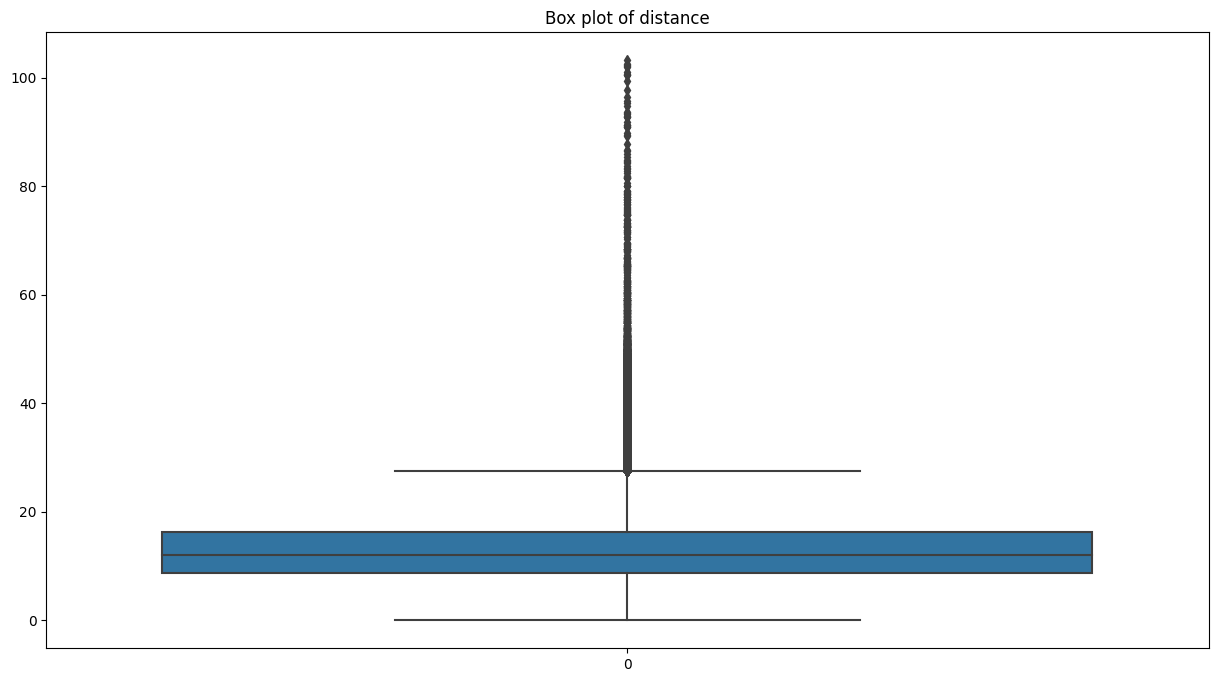

In [191]:
plt.figure(figsize=(15,8))
plt.title("Box plot of distance")
ax = sns.boxplot(data=df['speed'], orient="v")
     

In [192]:
percentile_q1 = np.percentile(df['speed'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['speed'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['speed'],75)
print(percentile_q3)
     

8.794898175683585
12.086081708653532
16.294766303053173


In [193]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)
     

lower limit for outlier  : -2.454904015370797
Upper limit for outlier  : 27.544568494107555


In [194]:
df=df[df['speed'] > lower_limit_outlier]
     


In [195]:
df=df[df['speed'] < upper_limit_outlier]
     

In [196]:
df.shape

(1105903, 19)

##### What all outlier treatment techniques have you used and why did you use those techniques?

The code implements the Interquartile Range (IQR) technique to handle outliers. This technique involves computing the first quartile (25th percentile), second quartile (50th percentile), and third quartile (75th percentile) of the variable. From this, the IQR is calculated by subtracting the first quartile from the third quartile. To identify outliers, lower and upper limits are defined as 1.5 times the IQR below the first quartile and 1.5 times the IQR above the third quartile, respectively. Any observations falling outside these limits are considered outliers and subsequently removed from the data. The IQR method is commonly used to identify and treat outliers because it considers the distribution of the data and eliminates values that fall outside the normal range of the dataset.

### 3. Categorical Encoding

In [197]:
# Encode your categorical columns

In [198]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'weekday_num', 'month', 'pickup_hour', 'pickup_minute',
       'weekday', 'distance', 'speed', 'pickup_date'],
      dtype='object')

In [199]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
df= pd.get_dummies(df, columns=['store_and_fwd_flag','passenger_count','vendor_id'], 
                        prefix=['flag','passenger_count','vendor_id']) 

In [200]:
df.head(3)

id     pickup_datetime    dropoff_datetime  pickup_longitude  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30            -73.98   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38            -73.98   
3  id3504673 2016-04-06 19:32:31 2016-04-06 19:39:40            -74.01   

   pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
0            40.77             -73.96             40.77            455   
1            40.74             -74.00             40.73            663   
3            40.72             -74.01             40.71            429   

   weekday_num  month  ...  distance  speed pickup_date  flag_N  flag_Y  \
0            0      3  ...      1.50  11.86  2016-03-14       1       0   
1            6      6  ...      1.81   9.80  2016-06-12       1       0   
3            2      4  ...      1.49  12.47  2016-04-06       1       0   

  passenger_count_1  passenger_count_2  passenger_count_3  vendor_id_1  \
0                 1                  0                  0            0   
1                 1                  0                  0            1   
3                 1                  0                  0            0   

   vendor_id_2  
0            1  
1            0  
3            1  

[3 rows x 23 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

To handle categorical variables in a numerical format suitable for machine learning algorithms, the technique used in this case is known as one-hot encoding or dummy encoding. This technique involves assigning binary values of 1 or 0 to each categorical value by creating a new column for each unique category. The value in the column is set to 1 if the category is present in the original data, and 0 otherwise. The purpose of using this method is to enable effective handling of categorical data in a machine learning model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [201]:
# Manipulate Features to minimize feature correlation and create new features

Using the pickup and dropoff latitudes and longitudes, we have already generated a distance column.

Based on the distance and trip duration, we have already computed the speed of the trip and created a speed column.

From the datetime columns, we have extracted several new features, including pickup weekday, month, weekday number, pickup hour, and pickup minute.

To add to our feature set, we will now use the latitudes and longitudes to create a new feature called trip direction

In [202]:
import math
"Creating a function to get the bearing"
def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    if brng < 0:
      brng = 360 + brng
      return brng
    else:
      return brng

In [203]:
df['trip_direction'] = df.apply(lambda x: get_bearing(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'], 
                       x['dropoff_longitude']), axis = 1)
     

#### 2. Feature Selection

In [204]:
# Select your features wisely to avoid overfitting

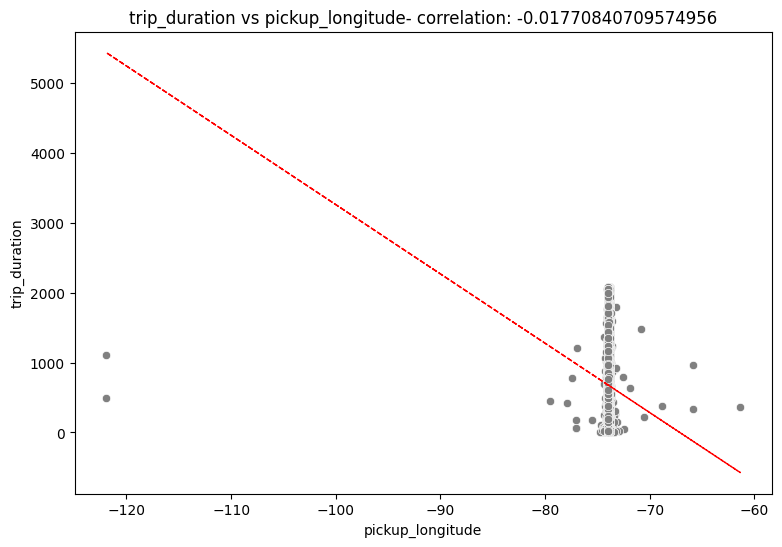

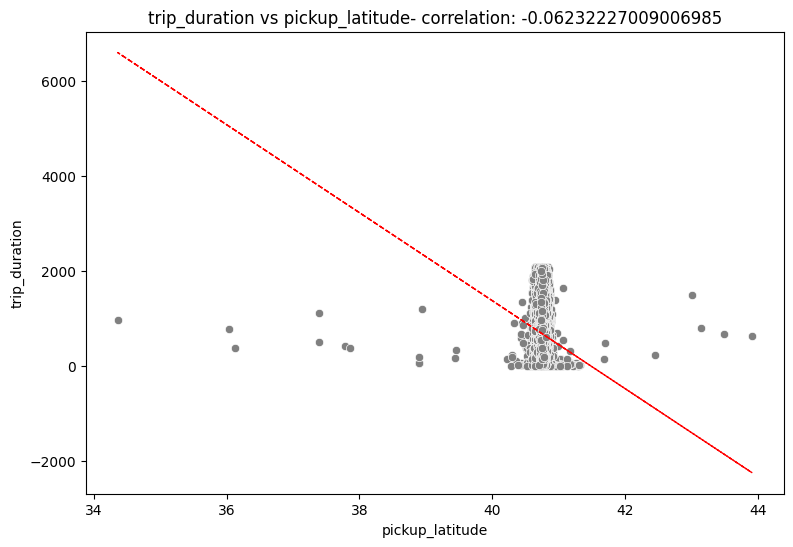

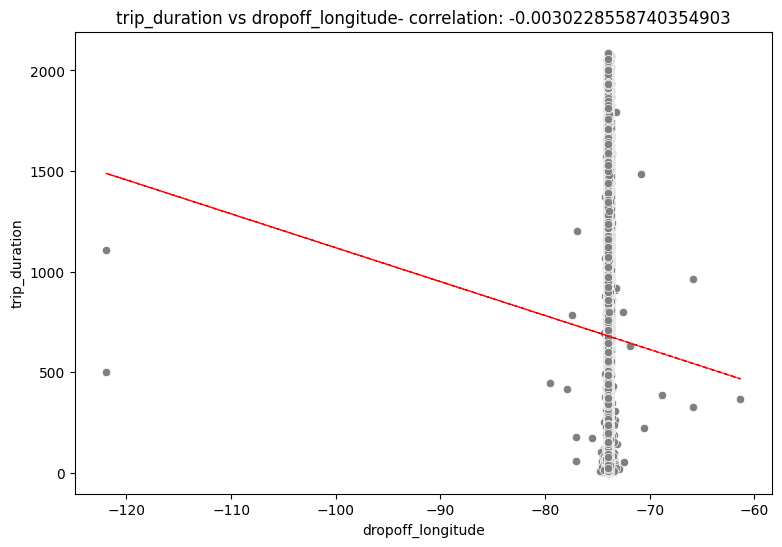

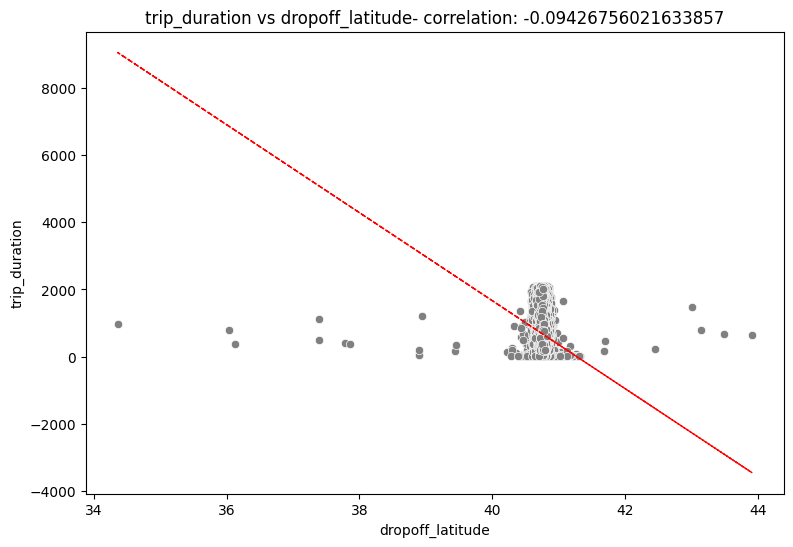

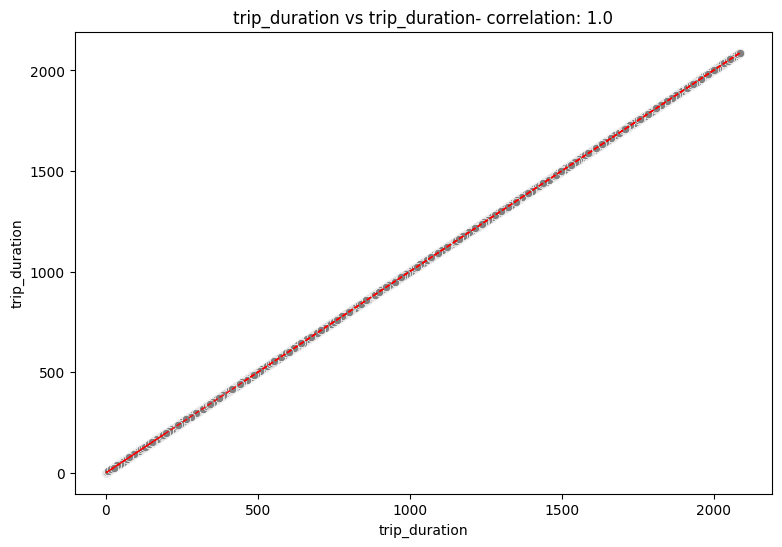

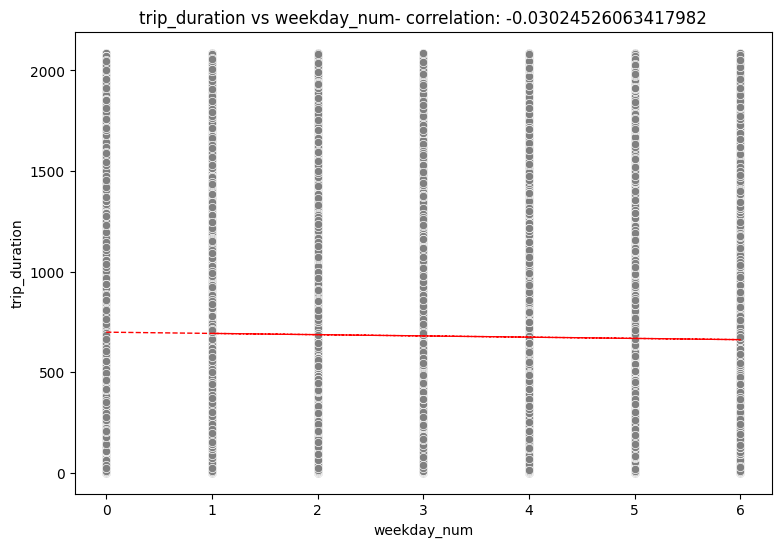

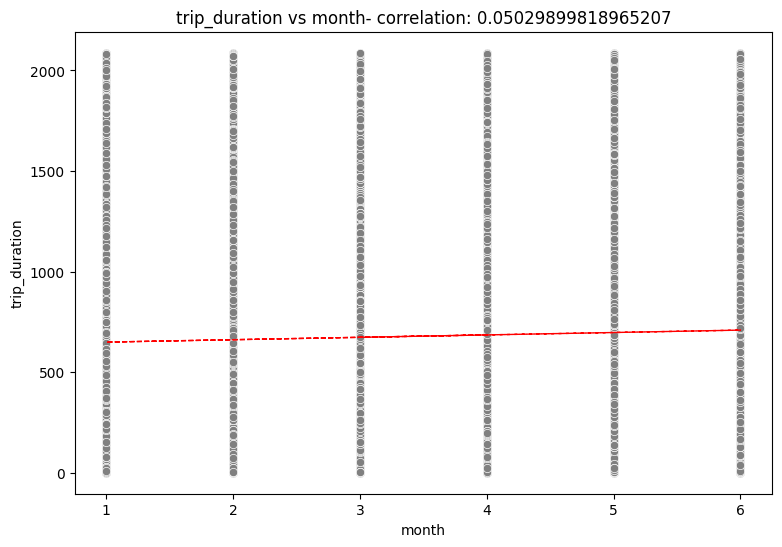

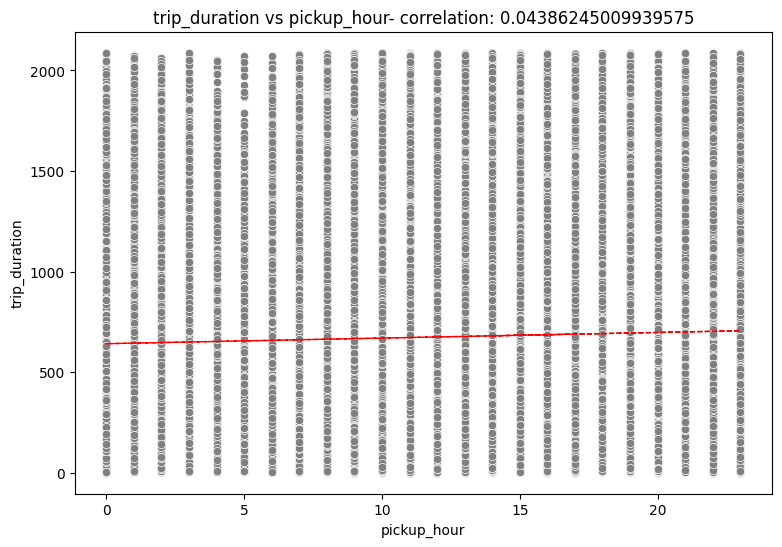

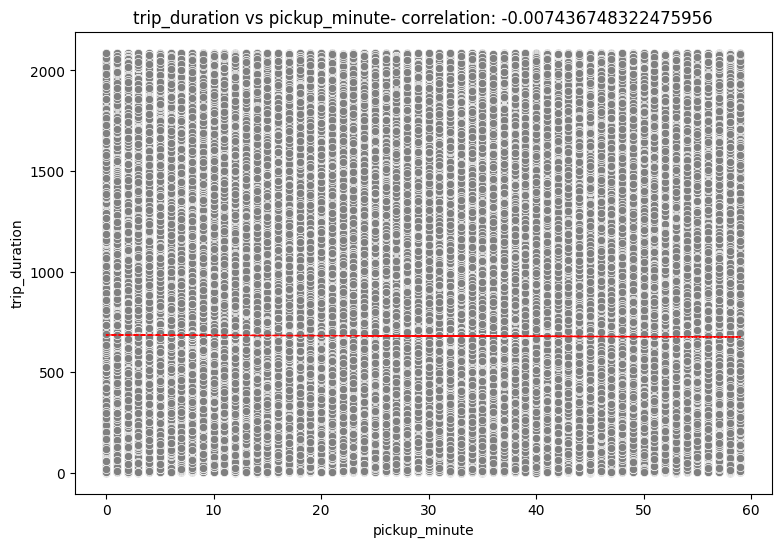

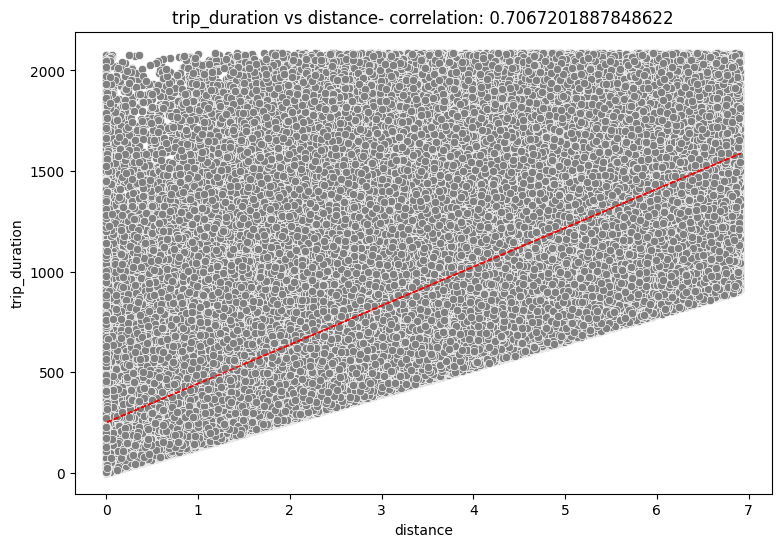

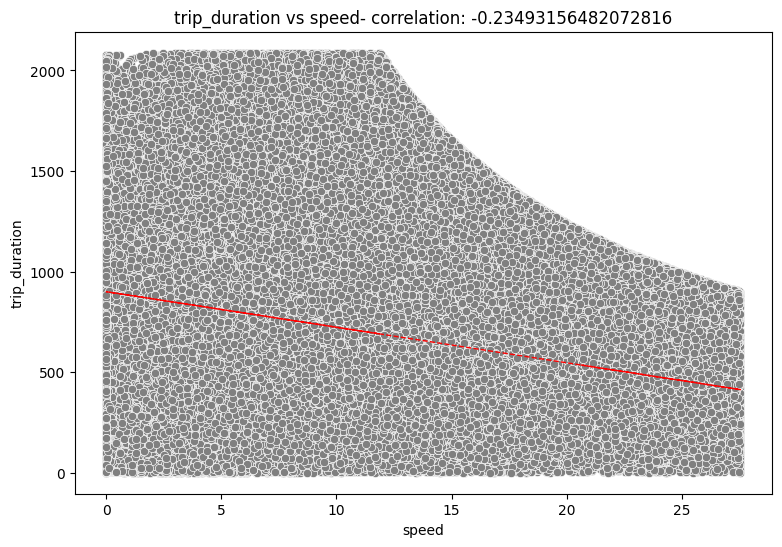

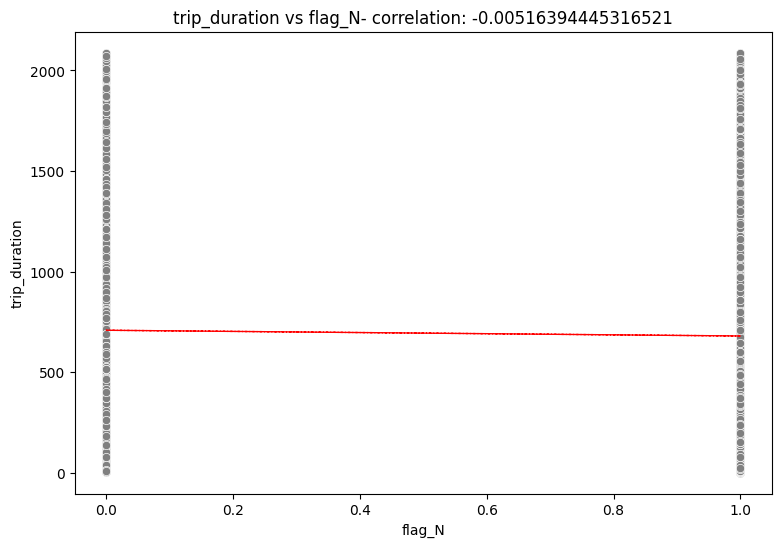

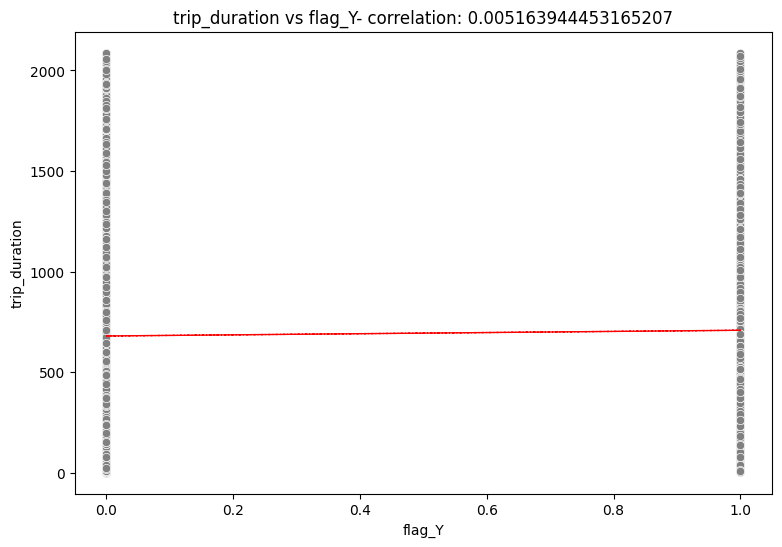

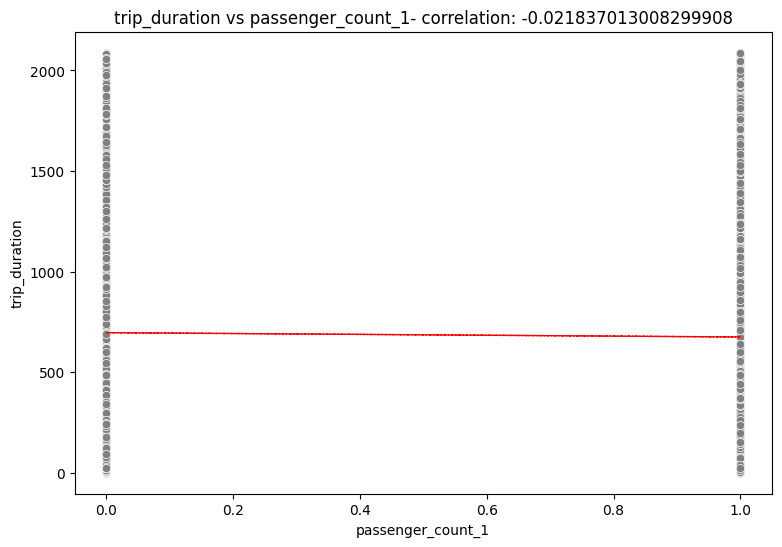

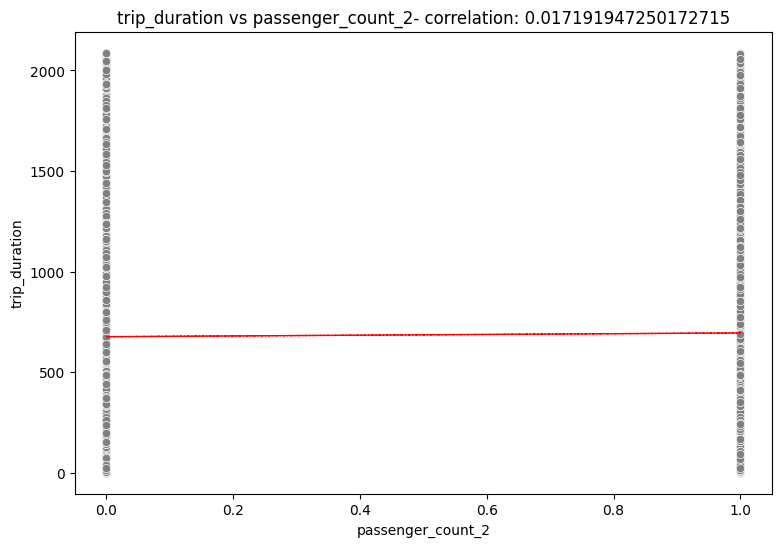

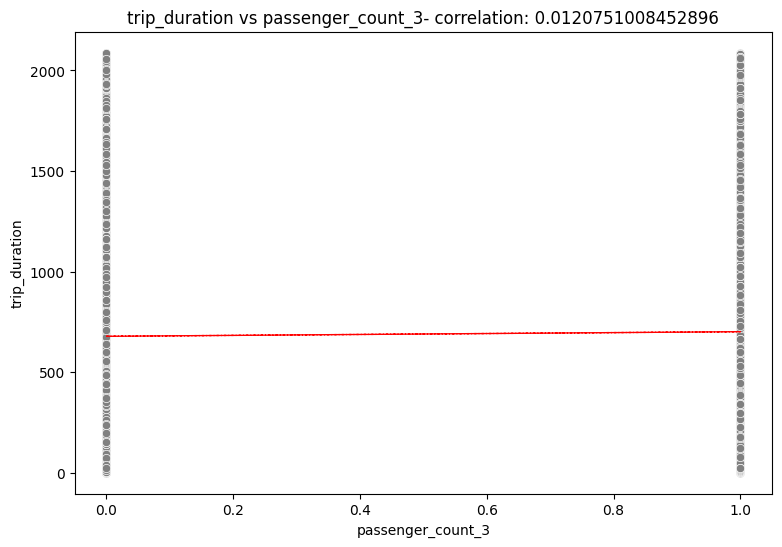

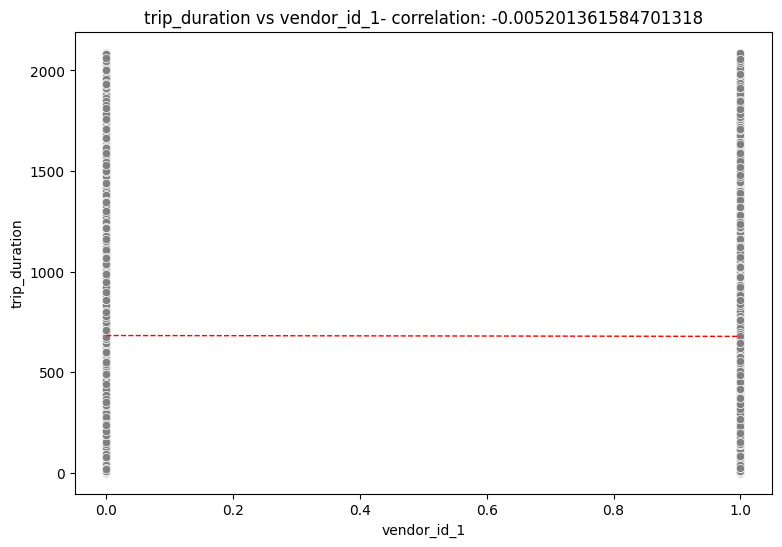

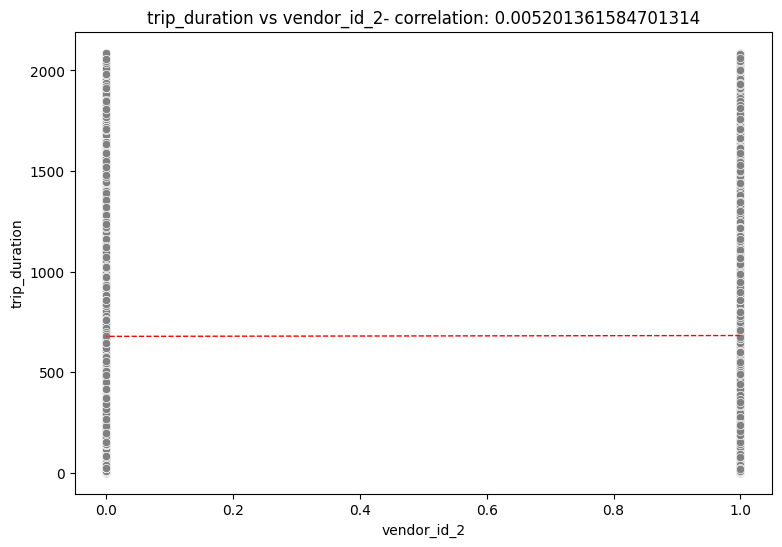

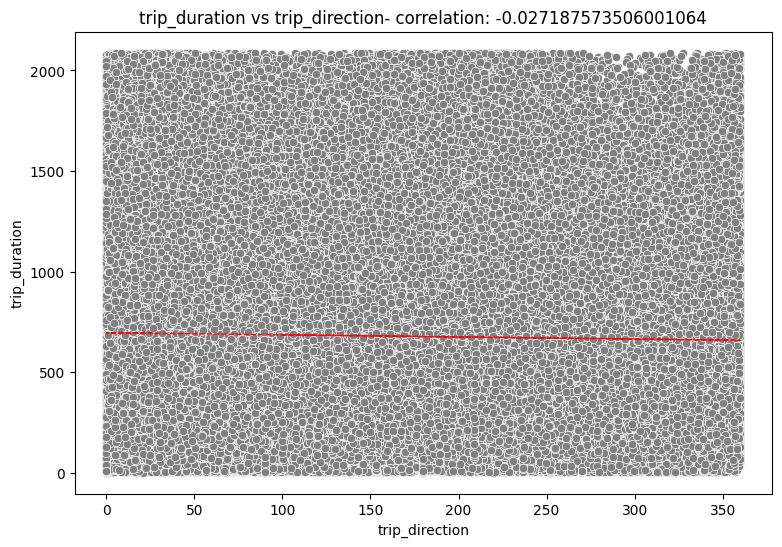

In [205]:
# Let's see how trip_duration and other features are related
for col in df.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)
    plt.show()

<Axes: >

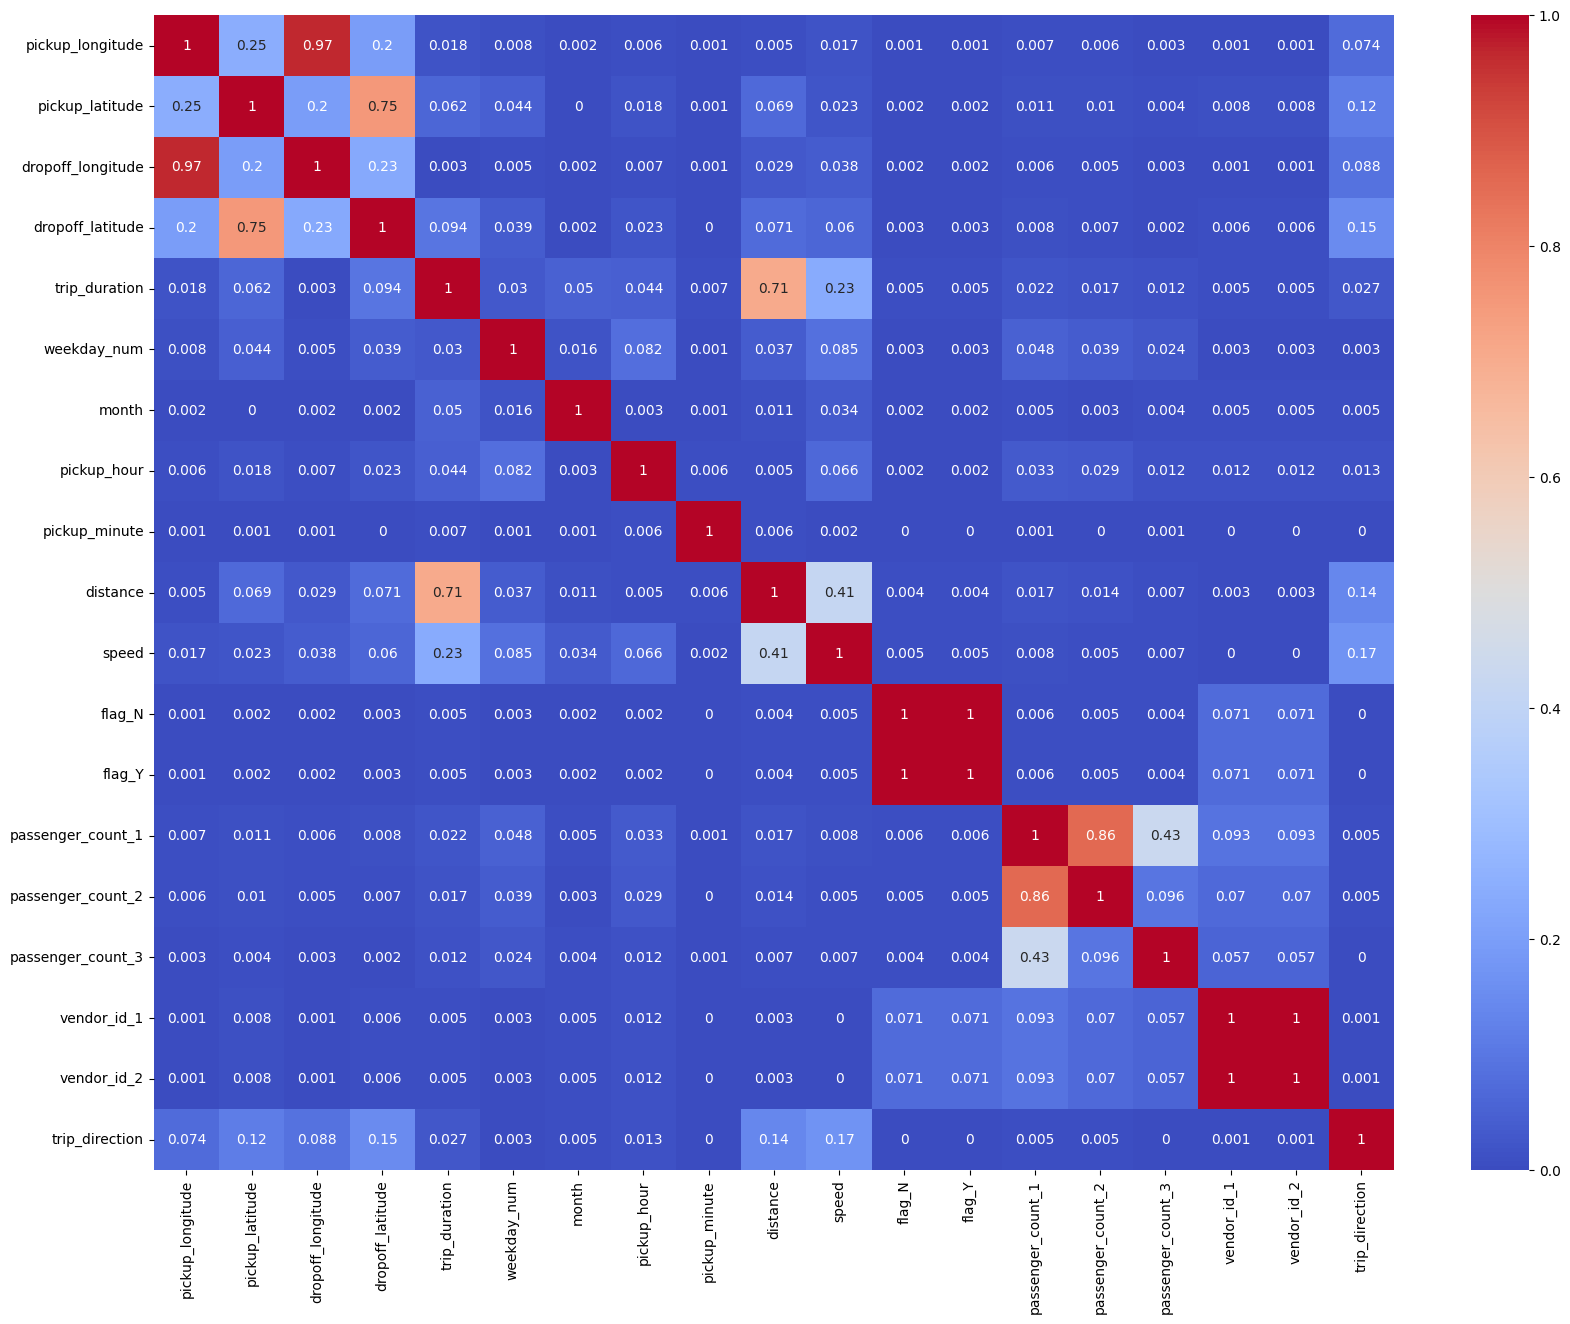

In [206]:
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(df.corr(),3)), annot=True, cmap='coolwarm')

##### What all feature selection methods have you used  and why?

We utilized a scatter plot to examine the impact of each variable on the target variable. Additionally, a correlation matrix (heatmap) can be employed to identify features with high correlations to the target variable and low correlations to other features.

##### Which all features you found important and why?

Our feature selection process involves assessing the information provided by each feature and eliminating redundant ones. To achieve this, we performed a correlation check and hypothesis testing.

1. Our hypothesis testing revealed that pickup weekday and pickup hours have an indirect impact on trip duration by affecting the number of trips and traffic times.

2. We observed a high correlation between pickup_latitude and dropoff_latitude, as well as pickup_longitude and dropoff_longitude. Thus, we will eliminate one of the features in each pair to avoid redundancy.

3. Similarly, we found high correlation among the passenger count features, namely Passenger_count_1, Passenger_count_2, and Passenger_count_3. We will keep the one that has a stronger relationship with the dependent variable.

4. The features flag_Y and flag_N, as well as vendor_id_1 and vendor_id_2, exhibit high correlation. We will keep only one feature from each pair.

5. We created the distance feature through data manipulation and found it to be highly impactful. Hence, we will include it in our analysis.

6. We decided to drop the speed feature, as it violates the independence assumption between the features and the target variable (trip duration) due to its derivation from the distance and trip duration. This could result in overfitting and reduced model performance.







CREATE FINAL DATARAME

In [207]:
df.columns
     

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'weekday_num', 'month', 'pickup_hour', 'pickup_minute',
       'weekday', 'distance', 'speed', 'pickup_date', 'flag_N', 'flag_Y',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'vendor_id_1', 'vendor_id_2', 'trip_direction'],
      dtype='object')

In [208]:
final_df= df[['vendor_id_1','passenger_count_1','pickup_longitude','dropoff_latitude','flag_Y',
              'weekday_num','pickup_hour','pickup_minute','trip_direction','distance','trip_duration']]
     

In [209]:
# check for heatmap if anything remains to avoid multicollinearity 

<Axes: >

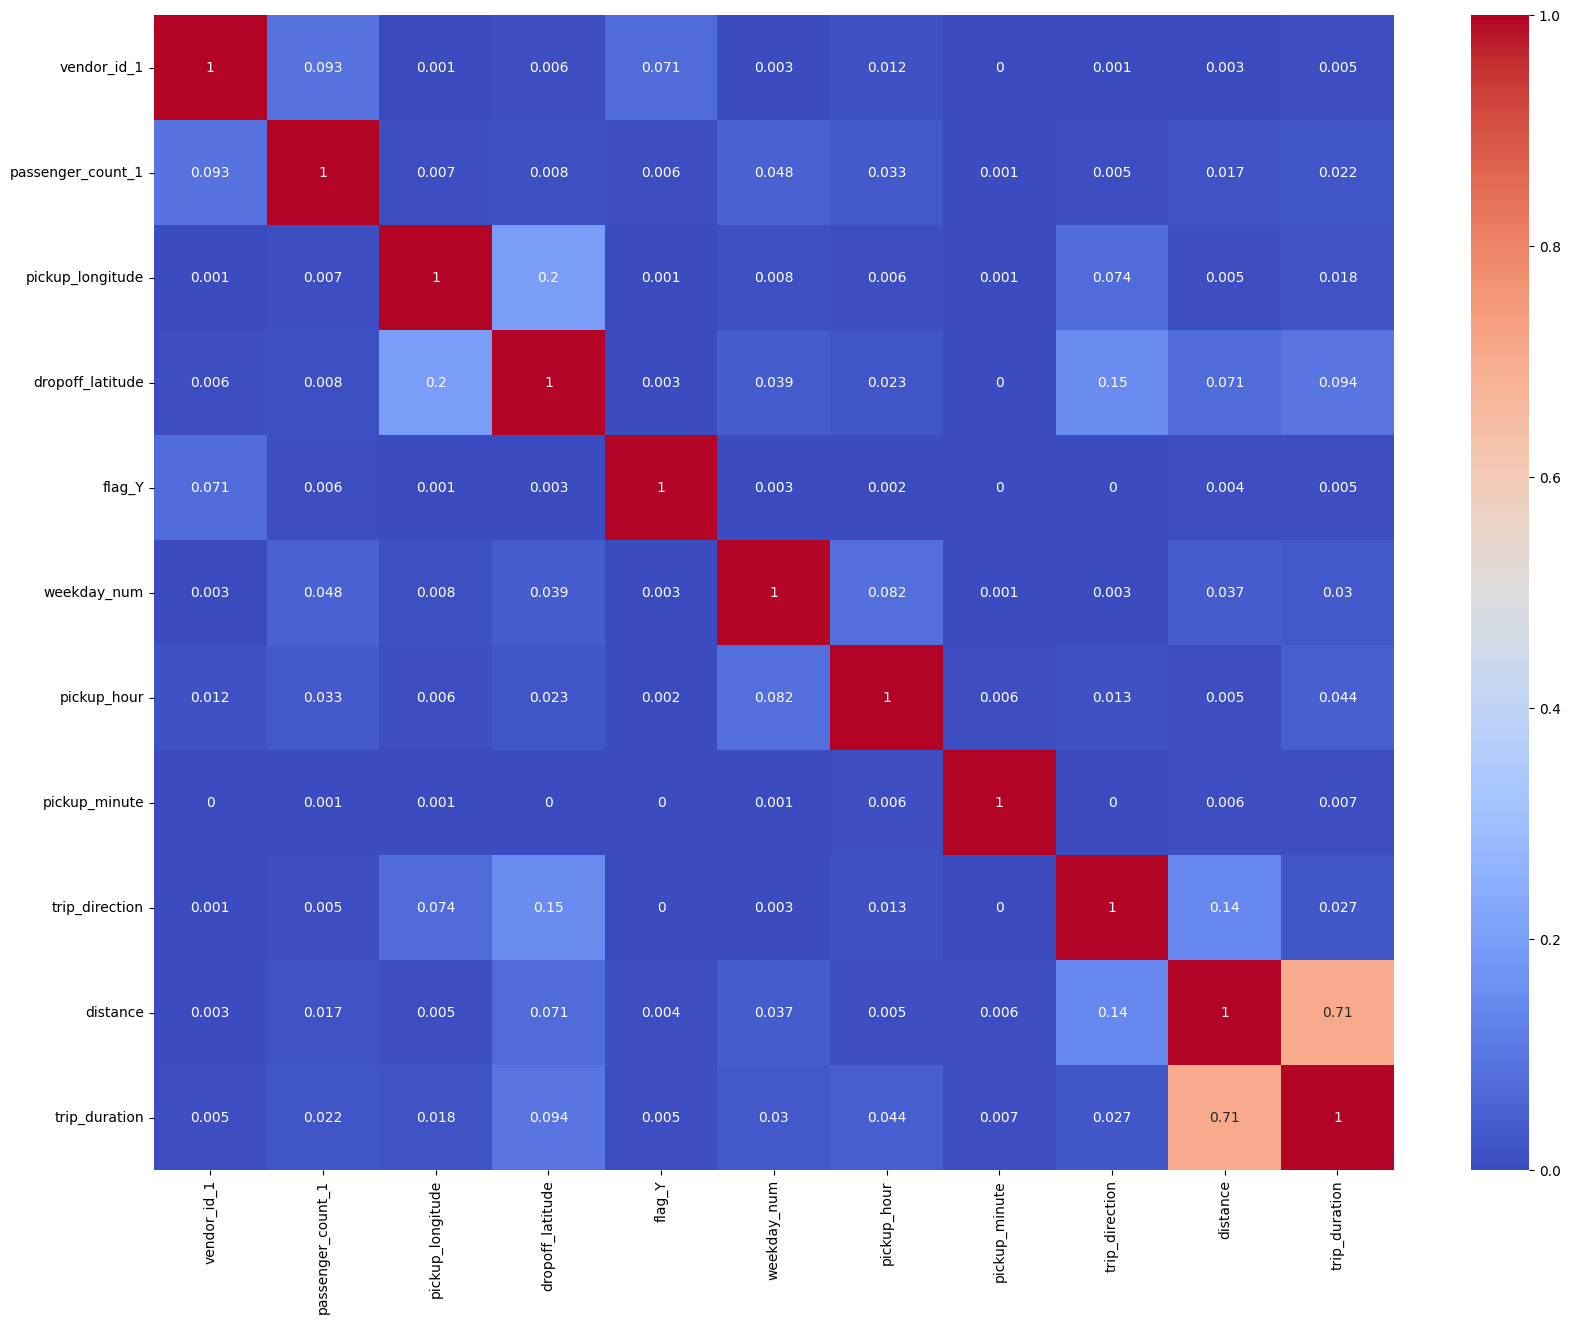

In [210]:
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(final_df.corr(),3)), annot=True, cmap='coolwarm')
    

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [211]:
# Transform Your data

In [212]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")
     

The number of unique counts in feature vendor_id_1 is: 2
The number of unique counts in feature passenger_count_1 is: 2
The number of unique counts in feature pickup_longitude is: 18854
The number of unique counts in feature dropoff_latitude is: 45492
The number of unique counts in feature flag_Y is: 2
The number of unique counts in feature weekday_num is: 7
The number of unique counts in feature pickup_hour is: 24
The number of unique counts in feature pickup_minute is: 60
The number of unique counts in feature trip_direction is: 1100136
The number of unique counts in feature distance is: 1100365
The number of unique counts in feature trip_duration is: 2088


In [213]:
# Storing the continous variables(number of unique counts >60) in a separate list and treating them in order to make gaussian distribution
cont_variables= ["trip_duration","distance","trip_direction"]

Before Applying Transformation


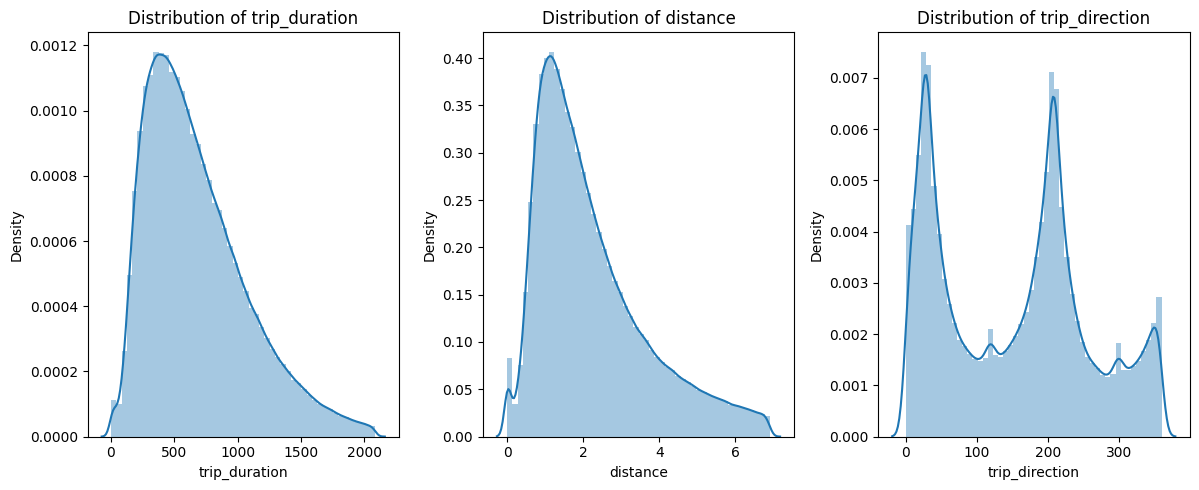

In [214]:
# Checking the distribution of each continous variable from our final dataframe
plt.figure(figsize=(20,5))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [215]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stats.probplot(df[feature],dist='norm',plot=pylab)

Q-Q Plot for variable: trip_duration
Q-Q Plot for variable: distance
Q-Q Plot for variable: trip_direction


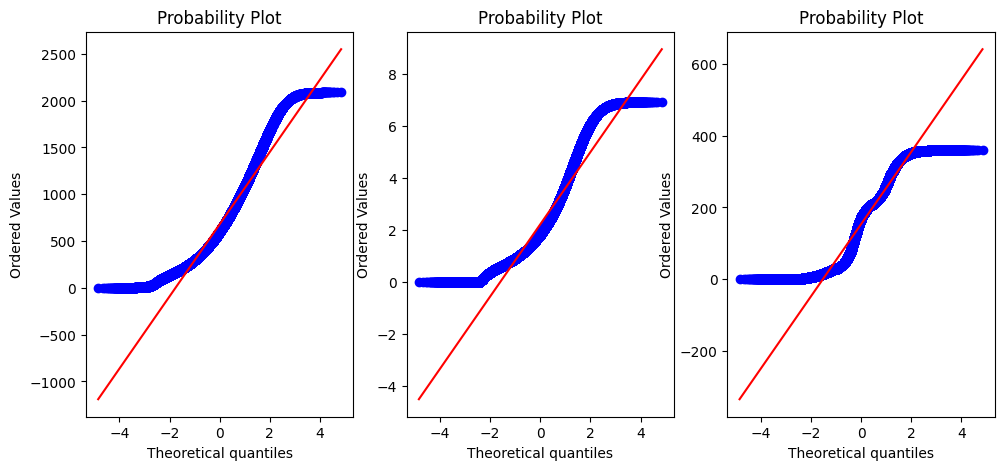

In [216]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)
plt.show()

The plots above clearly indicate that our continuous numeric features do not exhibit a perfectly normal distribution. Thus, we will explore various transformation techniques in an attempt to achieve a Gaussian distributed curve.

Let's create different copies and check which transformation is best for each feature

In [217]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()

####Logarithmic Transformation

After Applying Transformation


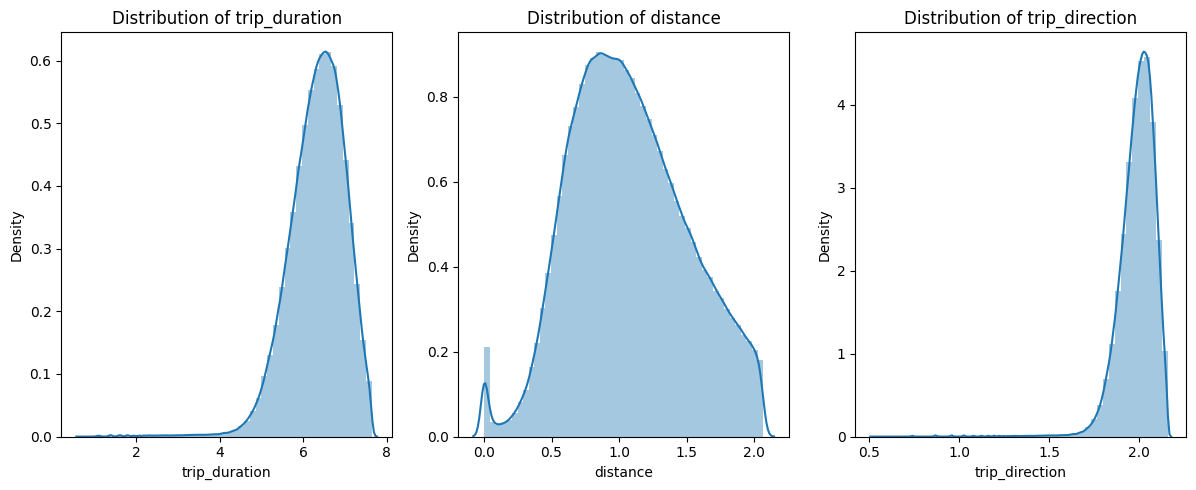

In [218]:
# Applying transformation on the above considered columns
test_df1['trip_duration']=np.log(test_df1['trip_duration']+1)
test_df1['distance']=np.log(test_df1['distance']+1)
test_df1['trip_direction']=np.log(test_df1['trip_duration']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: trip_duration
Q-Q Plot for variable: distance
Q-Q Plot for variable: trip_direction


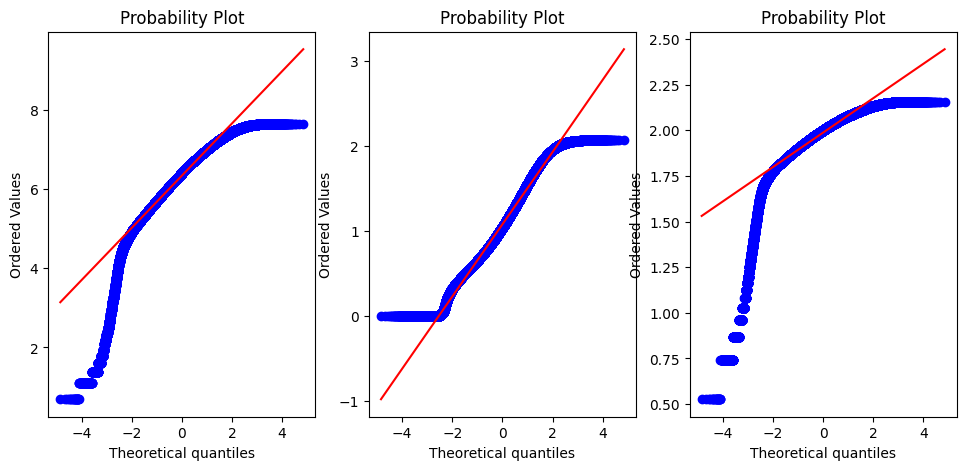

In [219]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)
plt.show()
     

####Reciprocal Trnasformation

After Applying Transformation


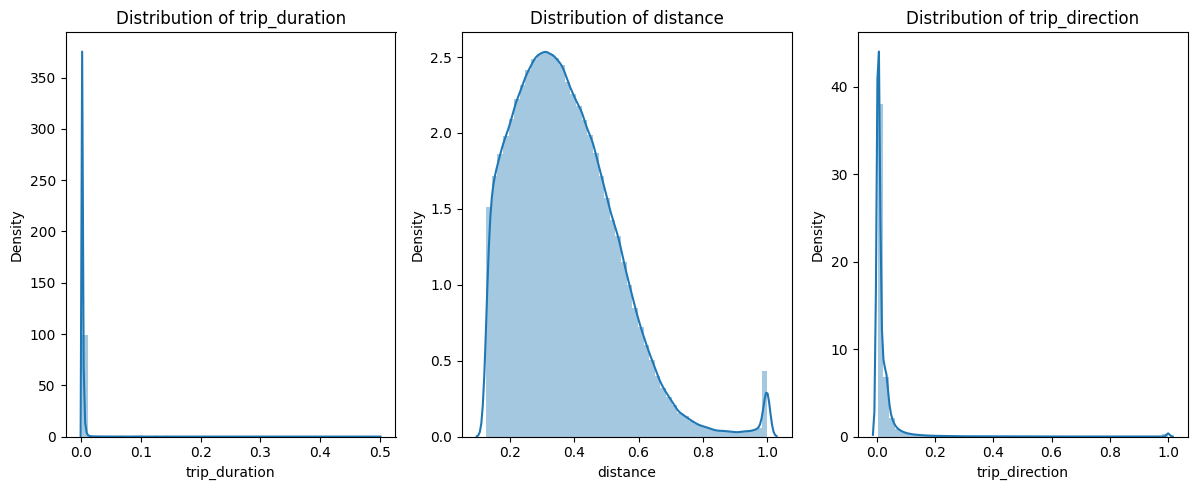

In [220]:
# Applying transformation on the above considered columns
test_df2['trip_duration']=1/(test_df2['trip_duration']+1)
test_df2['distance']=1/(test_df2['distance']+1)
test_df2['trip_direction']=1/(test_df2['trip_direction']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
     

Q-Q Plot for variable: trip_duration
Q-Q Plot for variable: distance
Q-Q Plot for variable: trip_direction


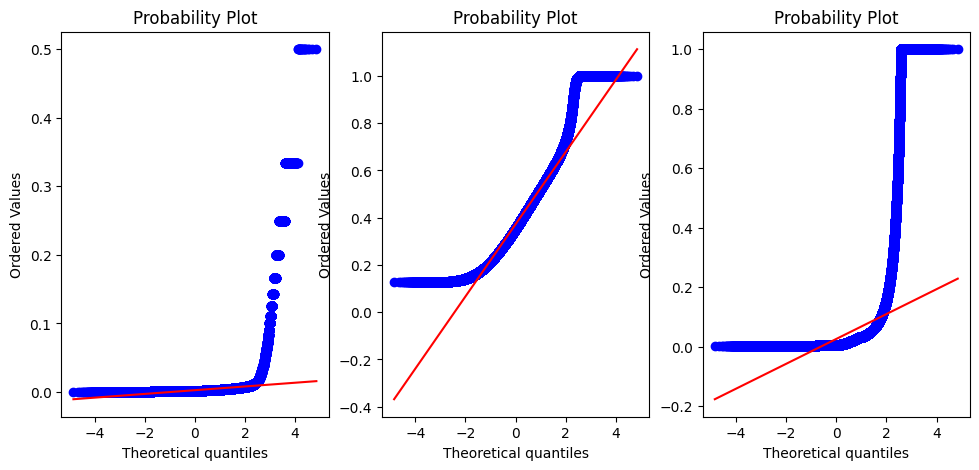

In [221]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)
plt.show()

####Square Root Transformation

After Applying Transformation


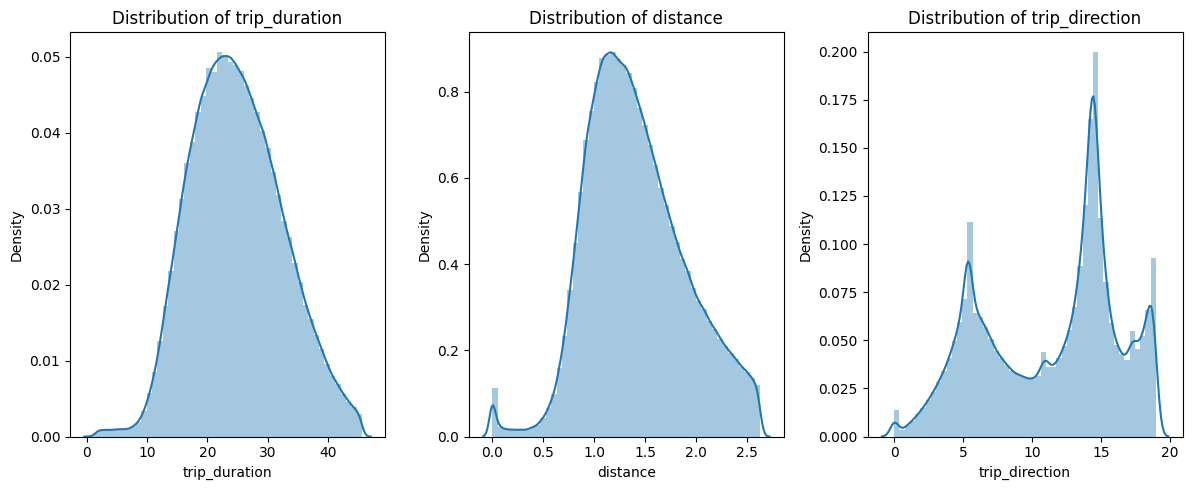

In [222]:
# Applying transformation on the above considered columns
test_df3['trip_duration']=(test_df3['trip_duration'])**(1/2)
test_df3['distance']=(test_df3['distance'])**(1/2)
test_df3['trip_direction']=(test_df3['trip_direction'])**(1/2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: trip_duration
Q-Q Plot for variable: distance
Q-Q Plot for variable: trip_direction


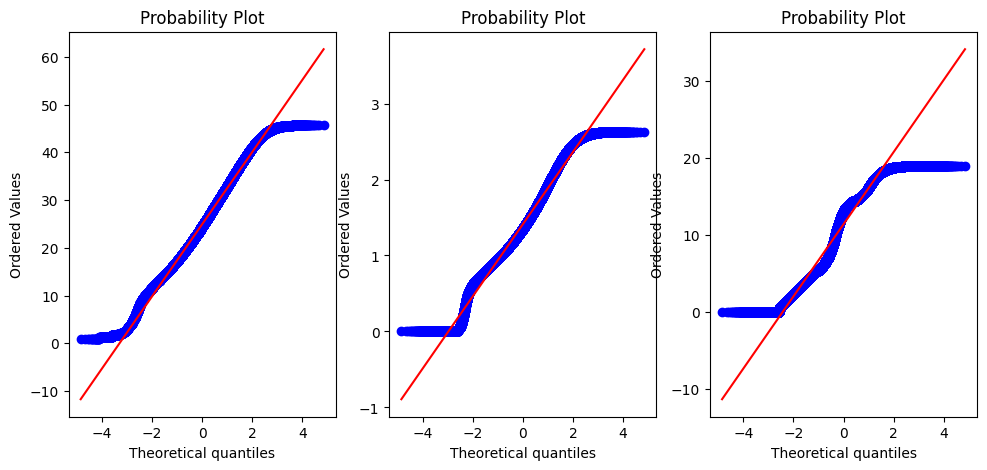

In [223]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)
plt.show()

####Exponential Transformation

After Applying Transformation


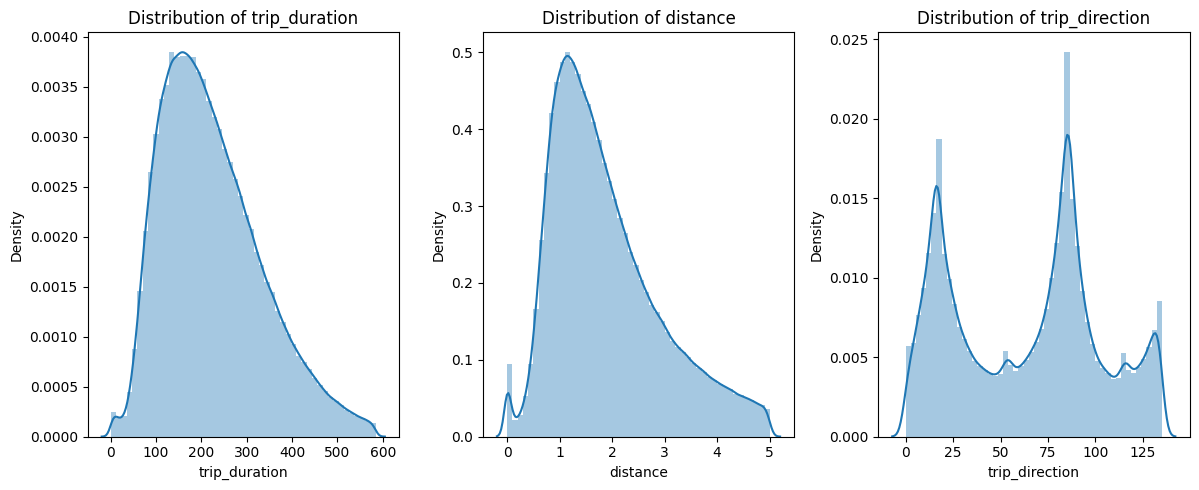

In [224]:
# Applying transformation on the above considered columns
test_df4['trip_duration']=(test_df4['trip_duration'])**(1/1.2)
test_df4['distance']=(test_df4['distance'])**(1/1.2)
test_df4['trip_direction']=(test_df4['trip_direction'])**(1/1.2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

After Applying Transformation


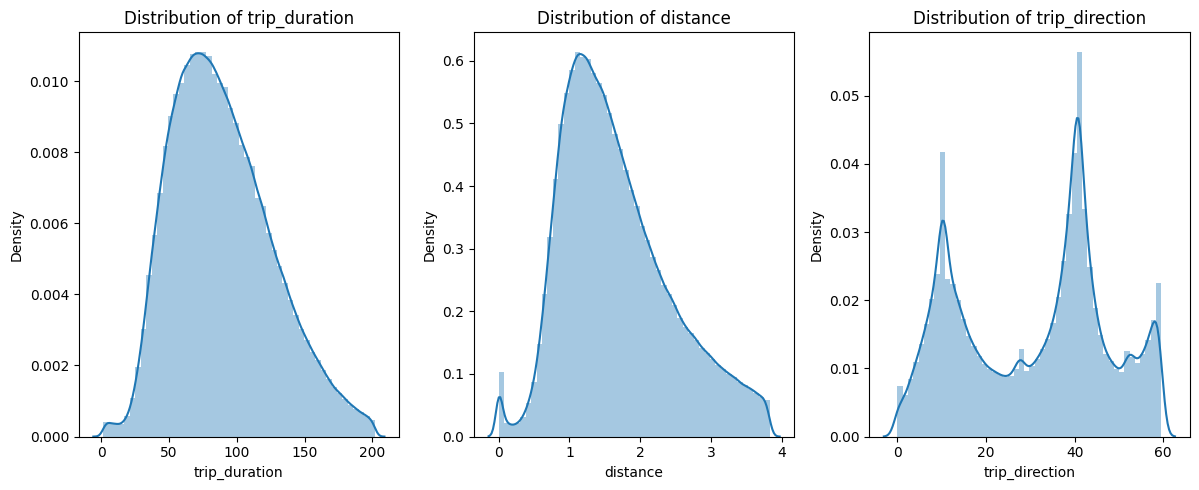

In [225]:
# Applying transformation on the above considered columns
test_df4['trip_duration']=(test_df4['trip_duration'])**(1/1.2)
test_df4['distance']=(test_df4['distance'])**(1/1.2)
test_df4['trip_direction']=(test_df4['trip_direction'])**(1/1.2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

**Applying Transformation**

From the above plots it is clear that:

1.Feature "trip_duration" needs square root transformation.

2.Feature "distance" needs square root transformation.

3.Feature "trip_direction" no transformation needed.

In [226]:
# Applying transformation on the above considered columns
## Square root transformation
final_df['trip_duration']=(final_df['trip_duration'])**(1/2)
final_df['distance']=(final_df['distance'])**(1/2)

Now we have normally distributed data for all of the continous variables.

### 6. Data Scaling

Before scaling our data let's just seperate our "x" and "y" variables

In [227]:
final_df.columns

Index(['vendor_id_1', 'passenger_count_1', 'pickup_longitude',
       'dropoff_latitude', 'flag_Y', 'weekday_num', 'pickup_hour',
       'pickup_minute', 'trip_direction', 'distance', 'trip_duration'],
      dtype='object')

In [228]:
# Separating "x" and "y" variables
x= final_df.drop('trip_duration',axis=1)
y= final_df[['trip_duration']]
print(x.shape)
print(y.shape)

(1105903, 10)
(1105903, 1)


In [229]:
# Scaling your data

In [230]:
# Creating object
std_regressor= StandardScaler()
# Fit and Transform
x= std_regressor.fit_transform(x)
     
     

##### Which method have you used to scale you data and why?

To standardize our data, we employed the StandardScaler function from the sklearn library. This step was crucial because having features in different scales can result in slow convergence or inaccurate results. Standardizing the features allowed us to compare them effectively and evaluate their impact on the target variable ("trip_duration") by analyzing the magnitude of their coefficients. Moreover, we opted to use a linear regression model, which assumes normally distributed data, and standardization helps enforce this assumption.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We have left with only few independant features in our dataset after doing feature selection, feature modelling and feature engineering.

We have 11,05,941 records stored in columns, hence no any problem will be there due curse of dimentionallity.

We have already reduced our features enough, without loosing originality of data.

### 8. Data Splitting

In [231]:
# Split your data to train and test. Choose Splitting ratio wisely.

Now let's split data in the ratio of 80:20 where 80 % will be in training set and 20 % will be in testing set by using train_test_split function available in sklearn library

In [232]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [233]:
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (884722, 10)
The shape of y_train is: (884722, 1)
The shape of x_test is: (221181, 10)
The shape of y_test is: (221181, 1)


##### What data splitting ratio have you used and why? 

We divided our data into training and testing sets using the train_test_split function available in the scikit-learn library, with a data splitting ratio of 80:20. 80% of the data was assigned to the training set, while the remaining 20% was assigned to the testing set. This approach is widely adopted to ensure that the model is trained and evaluated on distinct data samples, preventing overfitting and enhancing model generalization performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No

As Handling imbalanced dataset refers to the process of addressing class imbalance in a dataset where one class (minority class) has significantly fewer observations than another class (majority class). This imbalanced distribution of classes can have a negative impact on machine learning algorithms, as they may be biased towards the majority class, leading to poor performance in classifying the minority class.

So we dont need to balance the dataset.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [234]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [235]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***